In [1]:
#  NT were produced with:
#      selection=electron
#      massCut=70
#      ptLead=35
#      ptSublead=25
#      trigger=HLT_Ele27_WPTight_Gsf_v*
#      eleId=isHLTsafe
#
#  Produce plots applying:
#      trigger on MC + PhoID > 0.32 + preselection
#
#  Naming:
#
#  leadSigEOverE              --> smeared
#                                 "subleadSigEOverE        := subLeadingPhoton.sigEOverE"
#  leadUnsmearedSigmaEoE      --> unsmeared
#                                 "leadUnsmearedSigmaEoE   := leadingPhoton.userFloat('unsmearedSigmaEoE')",
#  leadRecoSigEOverE          --> unsmeared
#                                 "leadRecoSigEOverE       := leadingPhoton.userFloat('reco_regr_E_err') / leadingPhoton.userFloat('reco_regr_E')",
#  leadAfterSSTrSigEOverE     --> unsmeared + shower-shapes transformation
#                                 "leadAfterSSTrSigEOverE  := leadingPhoton.userFloat('afterShShTransf_regr_E_err') / leadingPhoton.userFloat('afterShShTransf_regr_E')",


In [2]:
from quantileRegression import quantileRegression
import pandas as pd
import numpy as np
import sys
import ROOT as rt
import matplotlib.pyplot as plt

Welcome to ROOTaaS 6.06/08


In [3]:
# Initialize the quantile regression object for data
qr_data = quantileRegression("data")

# This is what you want to correct
print "Load the data dataframe"
startEvtdata = 0
stopEvtdata  = -1
qr_data.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
             "cicNoSigmaIetaIeta/trees/",
             ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
              startEvtdata, stopEvtdata, 12345)

Load the data dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'leadSigEOverE', 'leadRecoSigEOverE', 'leadUnsmearedSigmaEoE', 'leadAfterSSTrSigEOverE', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subleadScPreshowerEnergy', 'subLeadPhoIDMVA', 'subleadSigEOverE', 'subleadRecoSigEOverE', 'subleadUnsmearedSigmaEoE', 'subleadAfterSSTrSigEOverE']
['cicNoSigmaIe

In [4]:
# Get the dataframe
df     = qr_data.getDF()
df     = df  .query('(mass > 70 and mass < 110)')
dfEB   = df  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110)') 
dfEE   = df  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)') 

In [5]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 0
stopEvtmc  = -1
qr_mc.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v8_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
              startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'leadSigEOverE', 'leadRecoSigEOverE', 'leadUnsmearedSigmaEoE', 'leadAfterSSTrSigEOverE', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subleadScPreshowerEnergy', 'subLeadPhoIDMVA', 'subleadSigEOverE', 'subleadRecoSigEOverE', 'subleadUnsmearedSigmaEoE', 'subleadAfterSSTrSigEOverE']
['cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL

In [6]:
# Get the dataframe
dfmc     = qr_mc.getDF()
dfmc     = dfmc  .query('(mass > 70 and mass < 110)') 
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)') 

In [7]:
from copy import copy

def data_mc(df_data,df_mc,var,bins,weight='weight',mclabels=[""],normalize=True,norm_min=0):
    
    weights = df_mc[weight].values if weight else None
    
    hists_mc = map(lambda x: np.histogram(df_mc['%s%s' % (var,x)].values,density=normalize,weights=weights,bins=bins)[0], 
                   mclabels)
    hist_data,_ =  np.histogram(df_data[var].values, density=False, bins=bins)

    norm_region = bins >= norm_min
    
    if normalize:
        hists_mc = map(lambda x: x*hist_data[norm_region[1:]].sum() / x[norm_region[1:]].sum(), hists_mc)    
    
    return hist_data,hists_mc


def draw_data_mc(bins,data,mc,figsize=(8,6),var=None,logy=False,ratio=False, ylim=[0,2],
                **kwargs):
    
    mcstyle=dict(alpha=0.5,linewidth=0)
    mcstyle.update(kwargs)
    datastyle=copy(kwargs)
    datastyle["alpha"] = 1. # No transparency for data
    
    binw=bins[1]-bins[0]
    if ratio:
        fig, axes = plt.subplots(2,figsize=figsize,sharex=True,gridspec_kw = {'height_ratios':[3, 1]})
        top = axes[0]
        bottom = axes[1]
        fig.tight_layout()
    else:
        fig = plt.figure(figsize=figsize)
        axes = None
        top = plt
    
    # FIXME: assumes uniform binning
    xc = bins[1:]-binw*0.5
    
    #print mc
    for hist, style in mc:
        pkwargs = copy(mcstyle)
        pkwargs.update(style)
        top.plot(xc+binw*0.5,hist,**pkwargs)
    top.errorbar( xc+binw*0.5, data,ls='None', xerr=np.ones_like(data)*binw*0.5, yerr=np.sqrt(data), color='black', 
                 label='Data', fmt='o', **datastyle )
        
    if axes == None: axes = fig.axes
    
    if ratio:
        ratios = []
        for hist, style in mc:
            rdata = data / hist
            rdata_err = np.sqrt(data) / hist
            ratios.append((rdata,rdata_err))
            rkwargs = {}
            if len(mc) == 1: rkwargs['color'] = 'black'
            elif "color" in style: rkwargs['color'] = style['color']
            rkwargs.update(datastyle)
            bottom.errorbar( xc+binw*0.5, rdata,ls='None', xerr=np.ones_like(rdata)*binw*0.5, yerr=rdata_err, 
                        **rkwargs)
        
        bottom.plot( (bins[0],bins[-1]), (1,1), 'k-' )
        bottom.set_ylabel('Data / MC')
        bottom.set_ylim(*ylim)
    
    if logy:
        axes[0].set_yscale('log')
    axes[0].set_xlim(bins[0],bins[-1])
    
    unit = None    
    if var != None:
        if type(var) != str:
            var, unit = var
        if unit: var += " (%s)" % unit
        axes[-1].set_xlabel(var)
    ylabel = 'Events / %1.3g' % binw
    if unit:
        ylabel += ' %s' % unit
    axes[0].set_ylabel(ylabel)

    top.legend(loc='best')  

In [8]:
%matplotlib inline

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


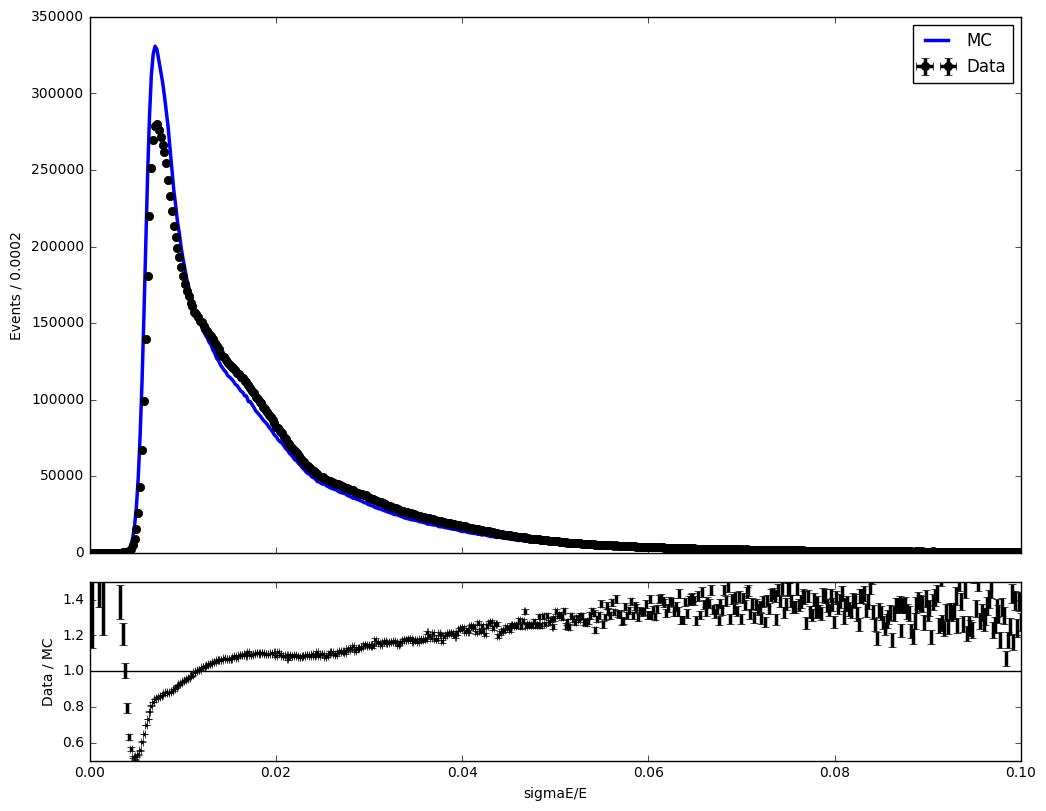

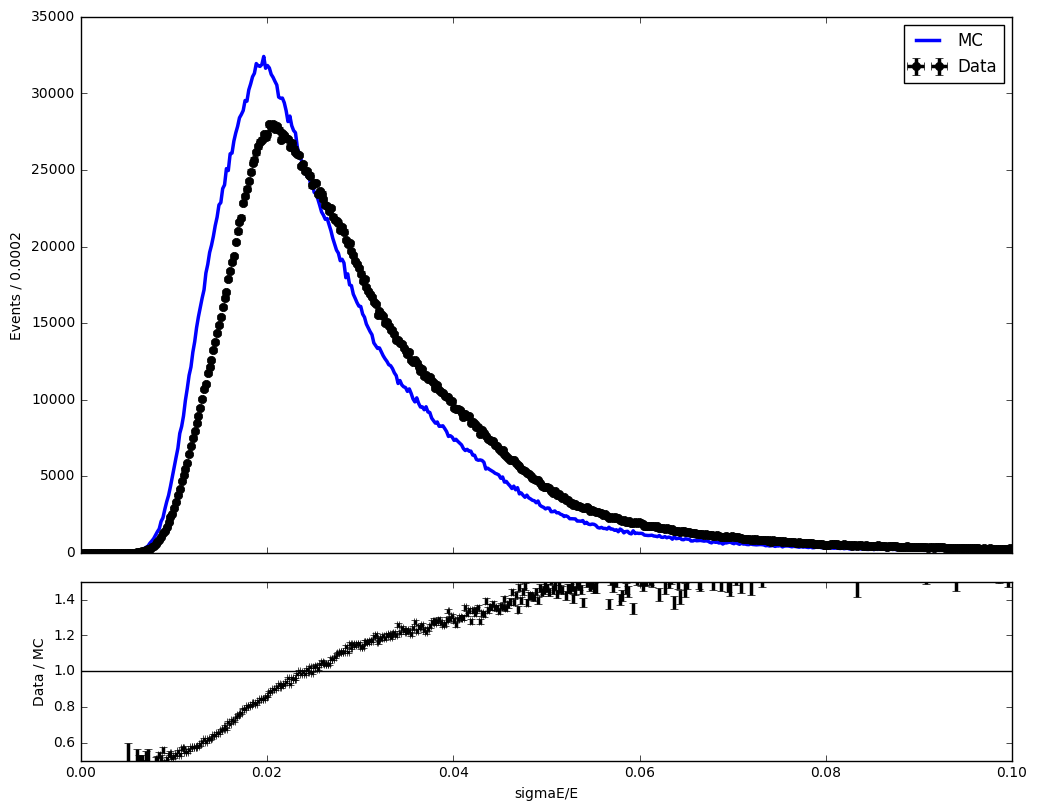

In [9]:
bins = np.linspace(0,0.1,500)
var = 'RecoSigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


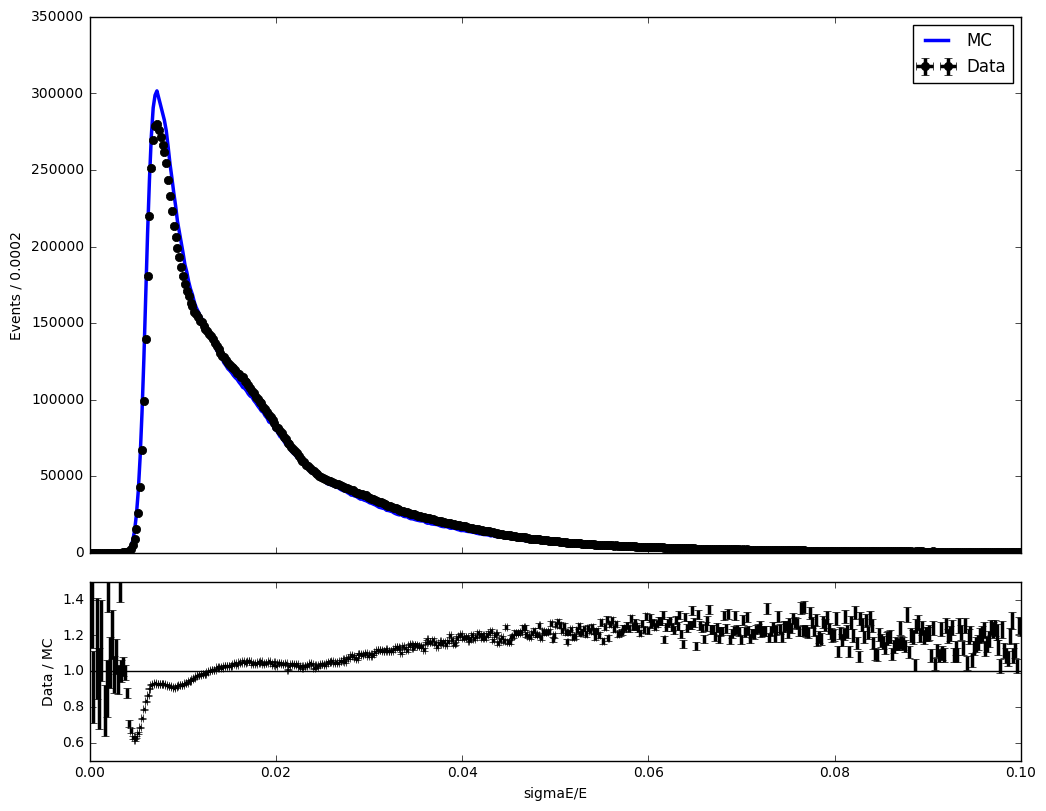

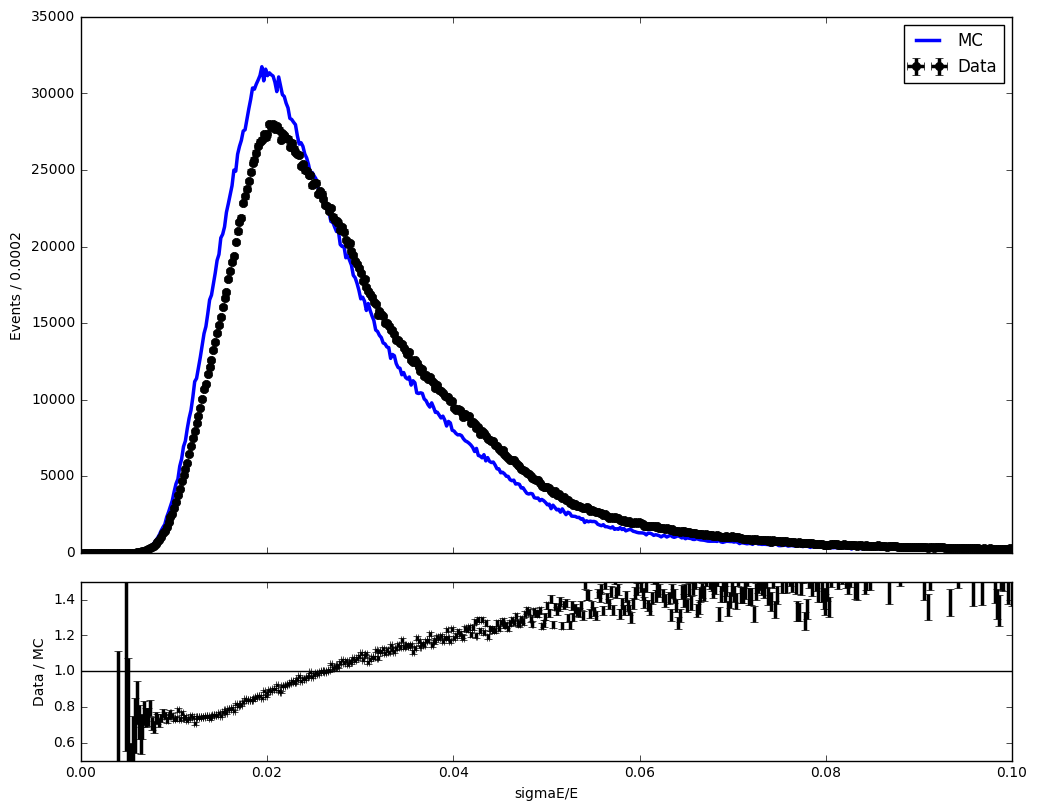

In [10]:
bins = np.linspace(0,0.1,500)
var = 'AfterSSTrSigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


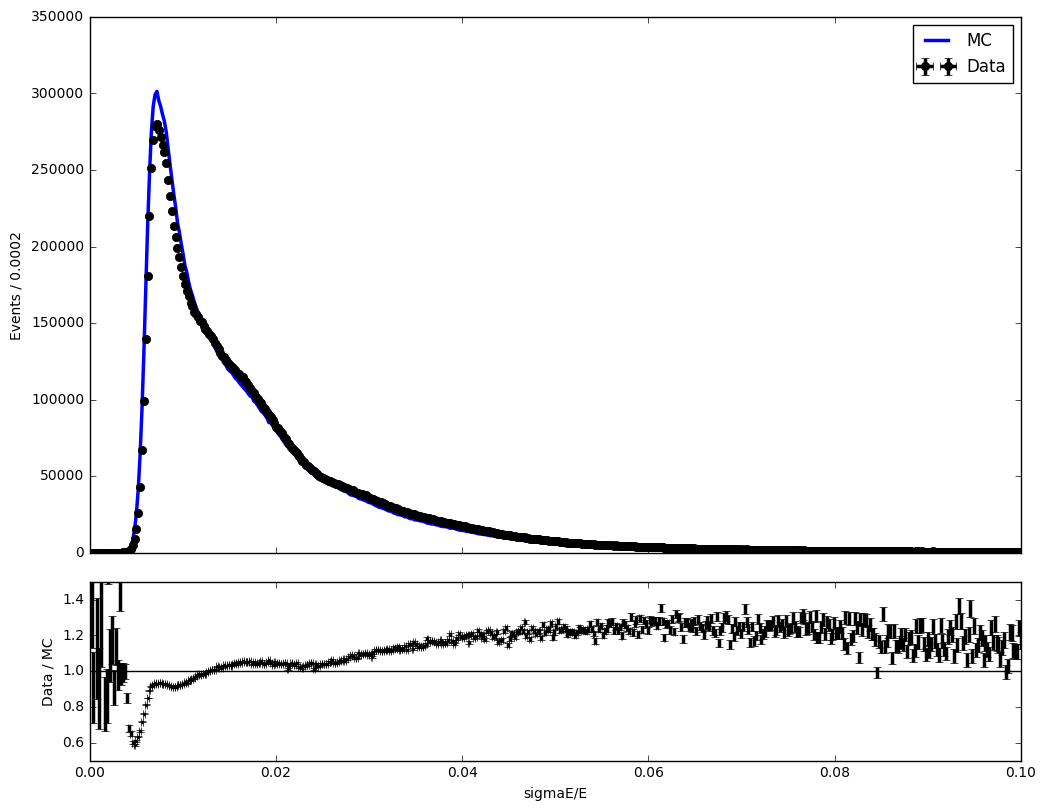

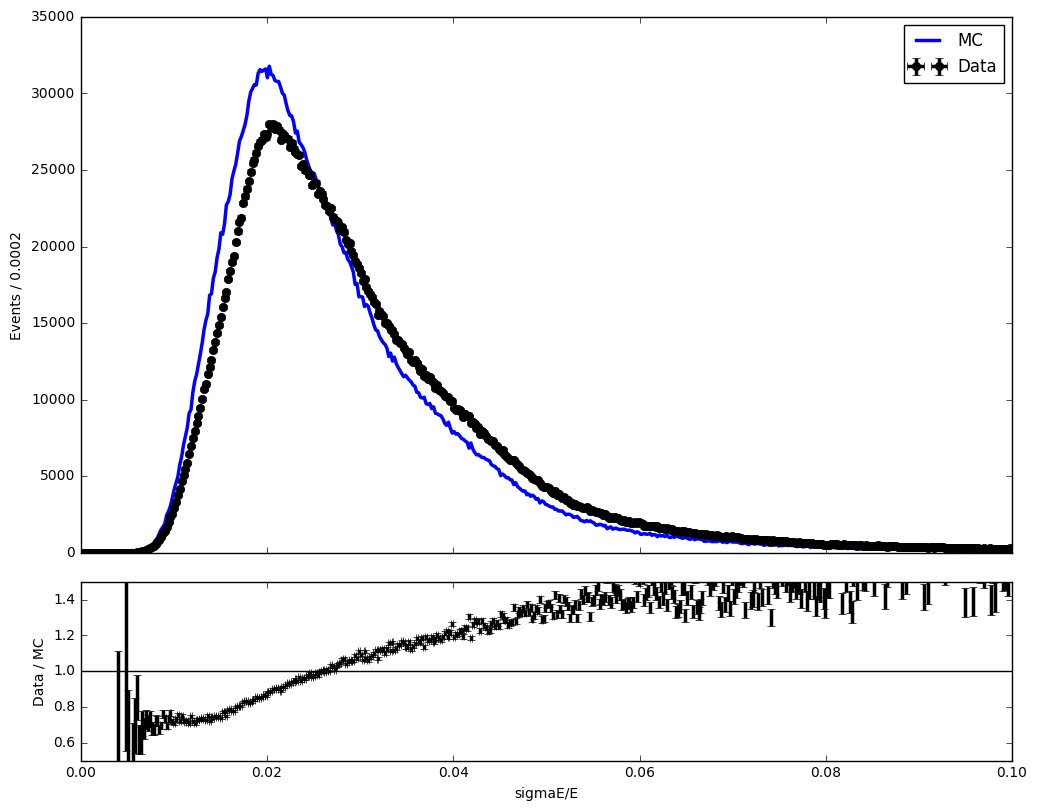

In [11]:
bins = np.linspace(0,0.1,500)
var = 'UnsmearedSigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


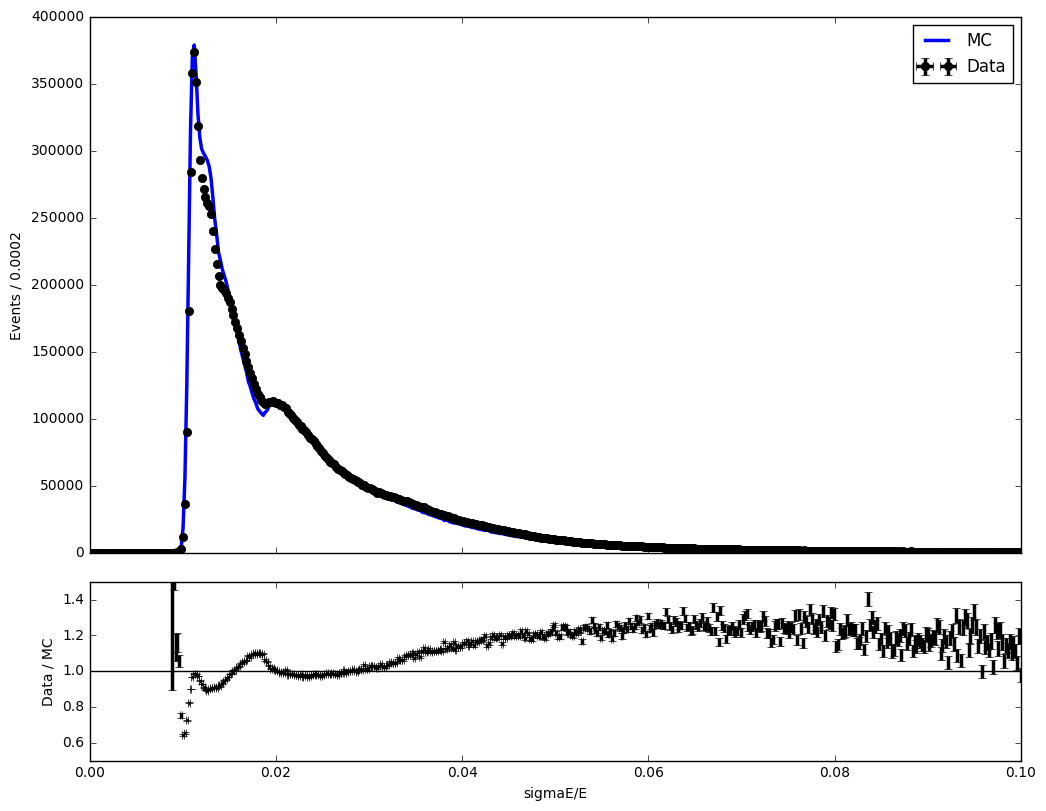

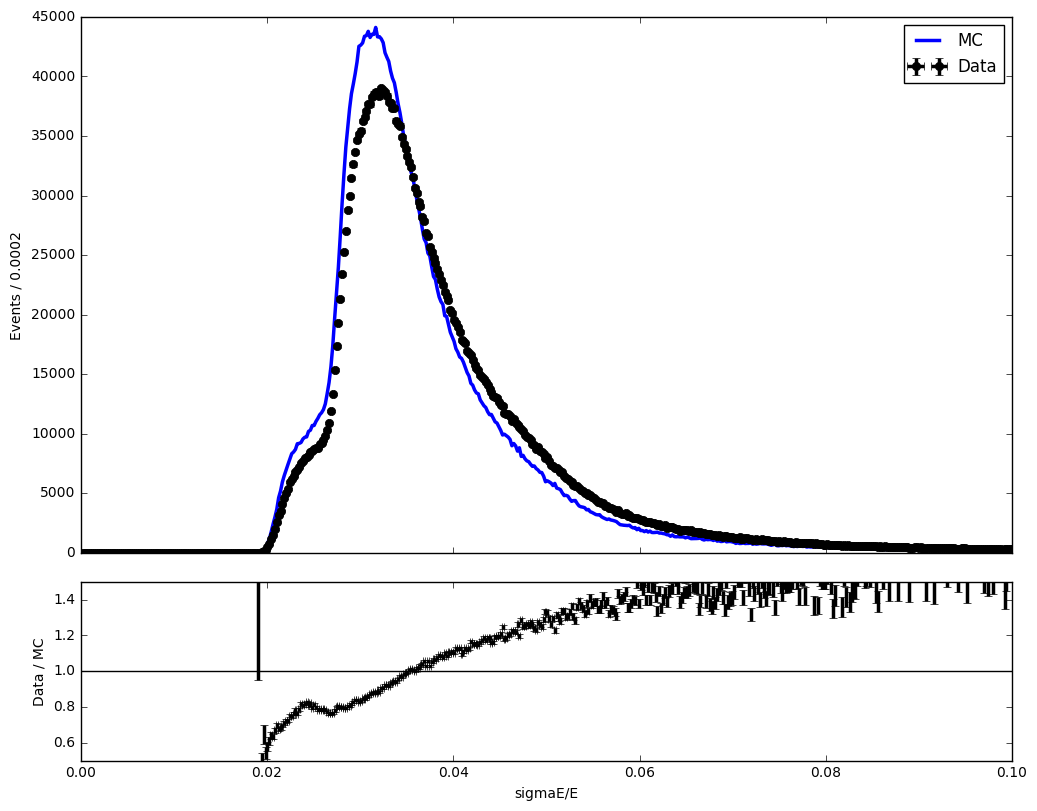

In [12]:
bins = np.linspace(0,0.1,500)
var = 'SigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


In [13]:
dfmcEBPhoID   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and PhoIDMVA > 0.32') 
dfmcEEPhoID   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110) and PhoIDMVA > 0.32 ') 
dfEBPhoID     = df  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and PhoIDMVA > 0.32') 
dfEEPhoID     = df  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110) and PhoIDMVA > 0.32 ') 


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


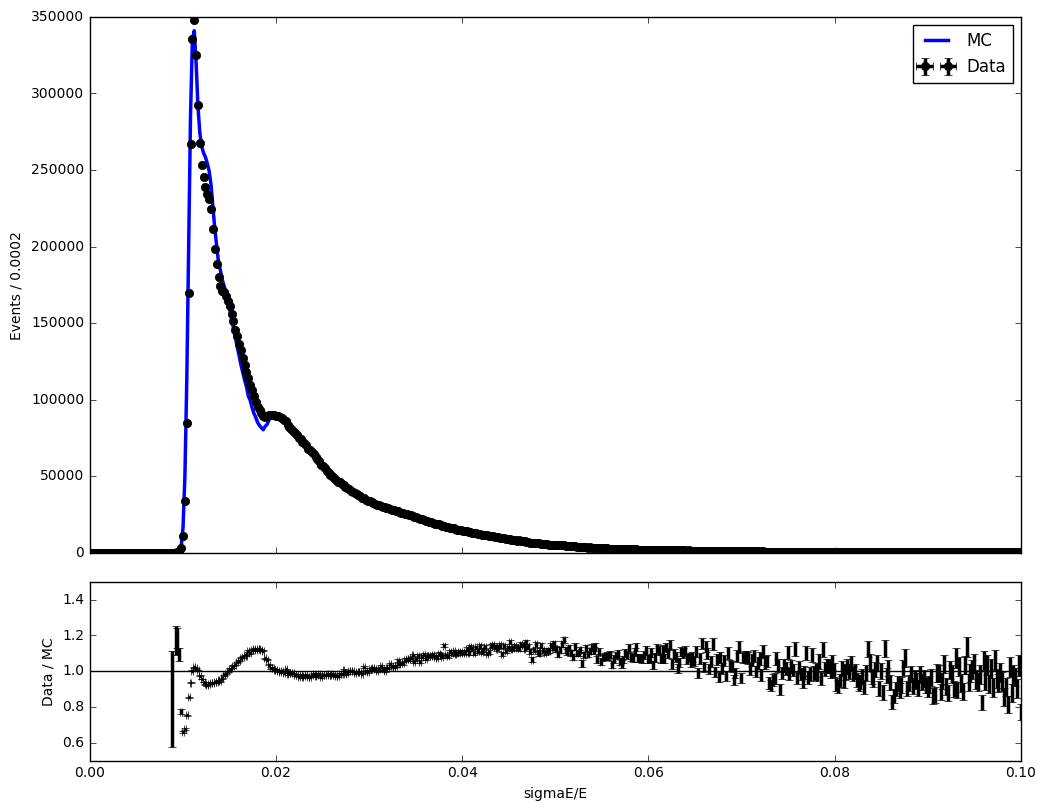

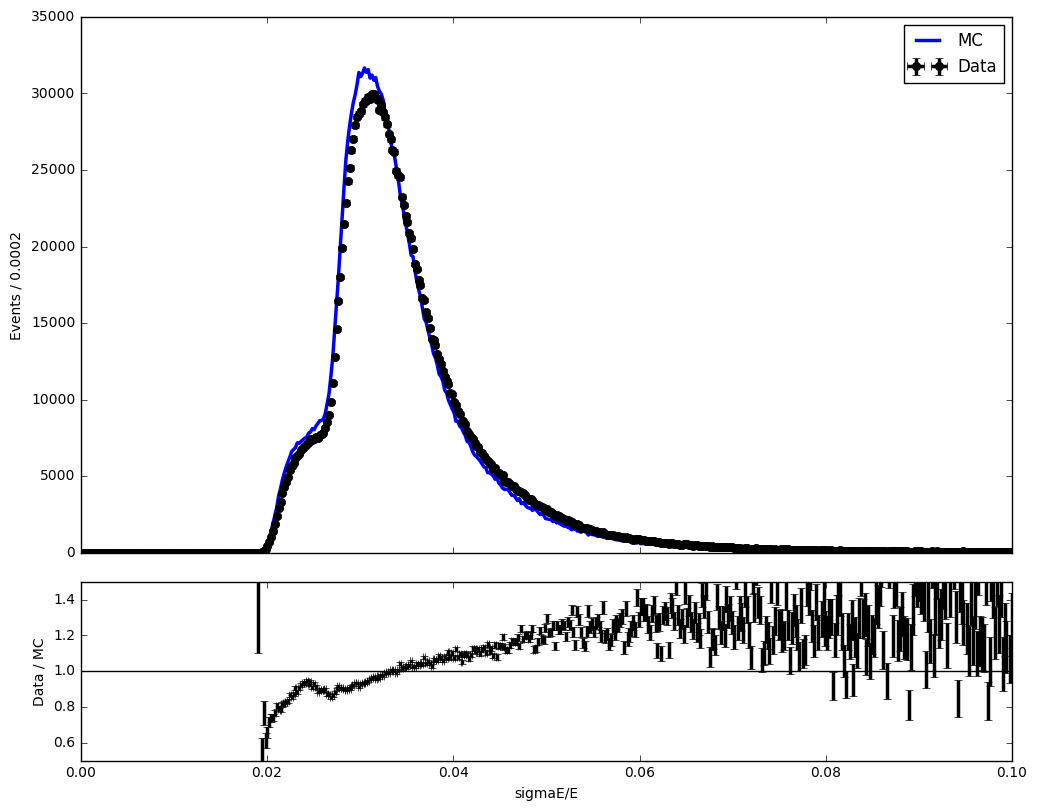

In [14]:
bins = np.linspace(0,0.1,500)
var = 'SigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEBPhoID,dfmcEBPhoID), (dfEEPhoID,dfmcEEPhoID) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


In [15]:
dfmcEEPhoID   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110) and PhoIDMVA > 0.32 and R9>0.8') 
dfEEPhoID     = df  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110) and PhoIDMVA > 0.32 and R9>0.8') 


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


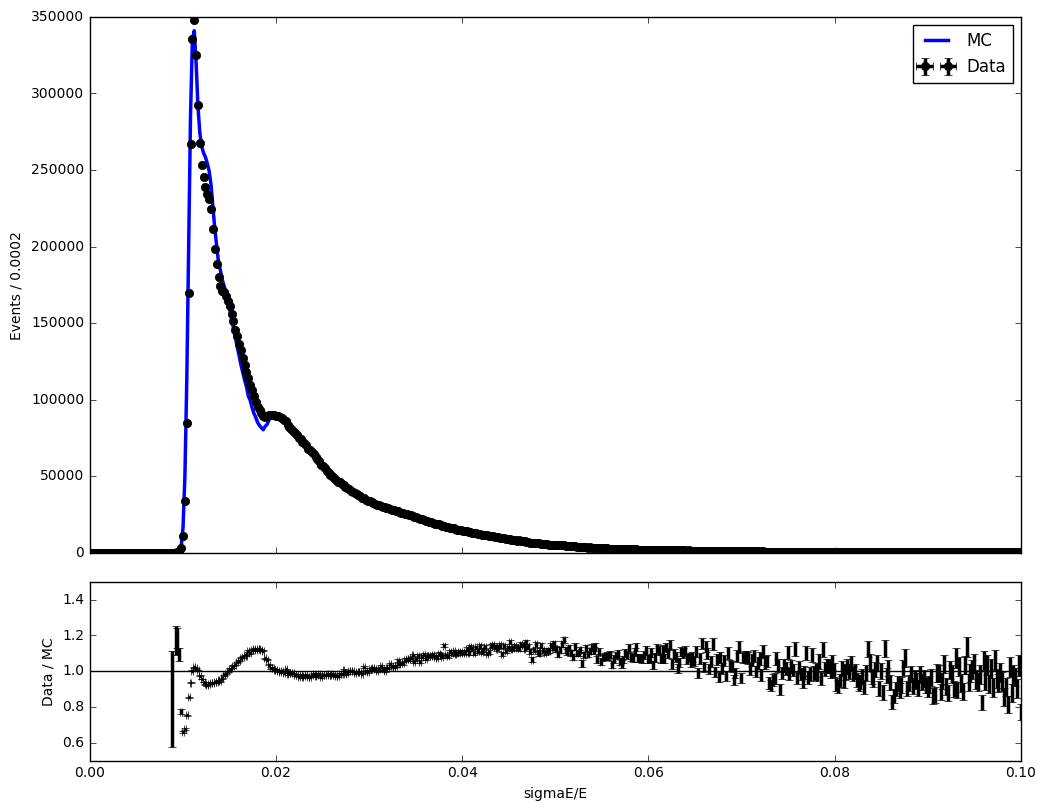

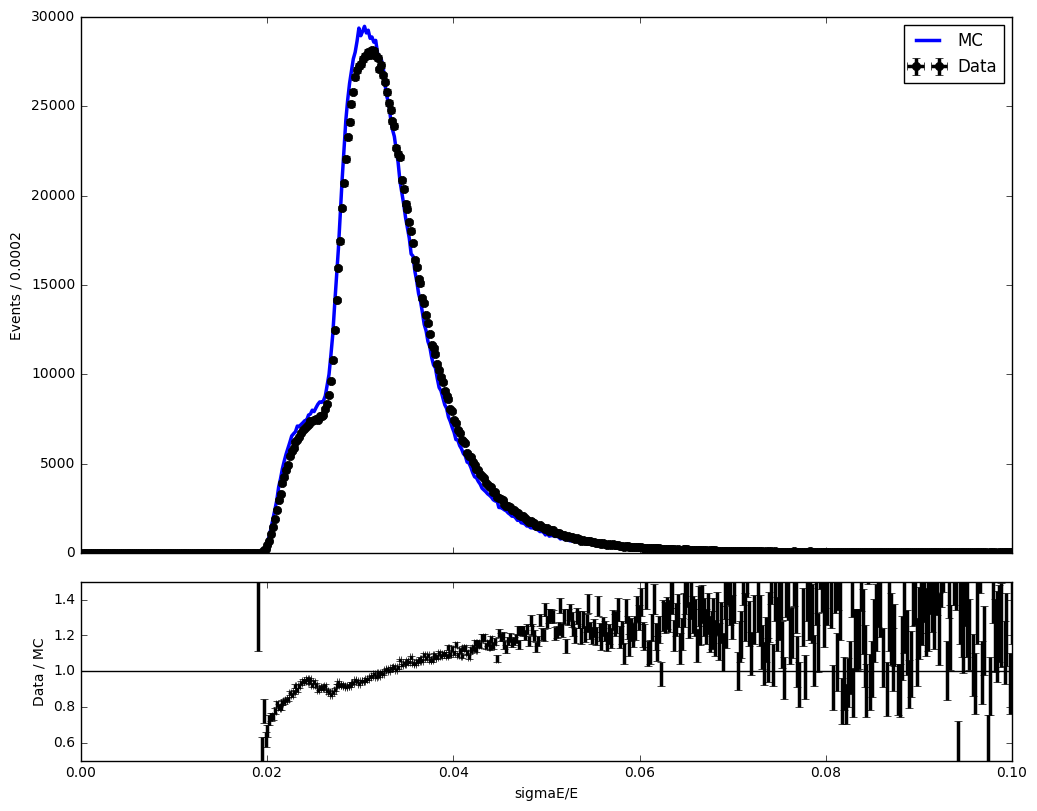

In [16]:
bins = np.linspace(0,0.1,500)
var = 'SigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEBPhoID,dfmcEBPhoID), (dfEEPhoID,dfmcEEPhoID) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


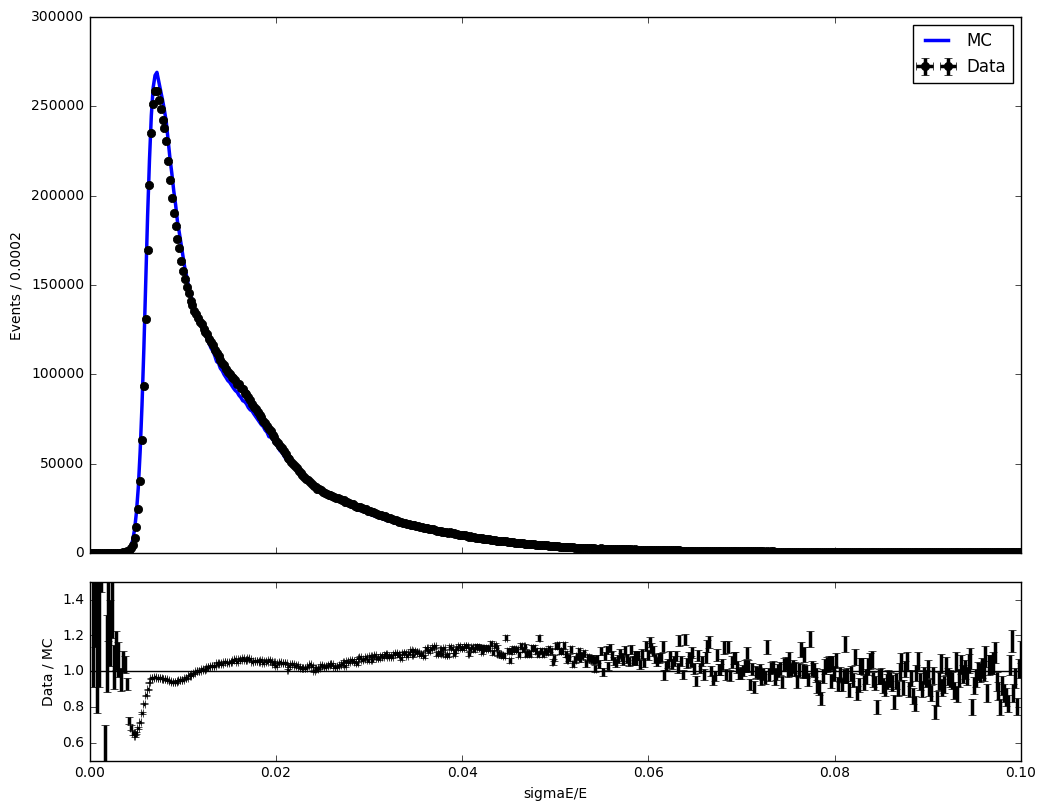

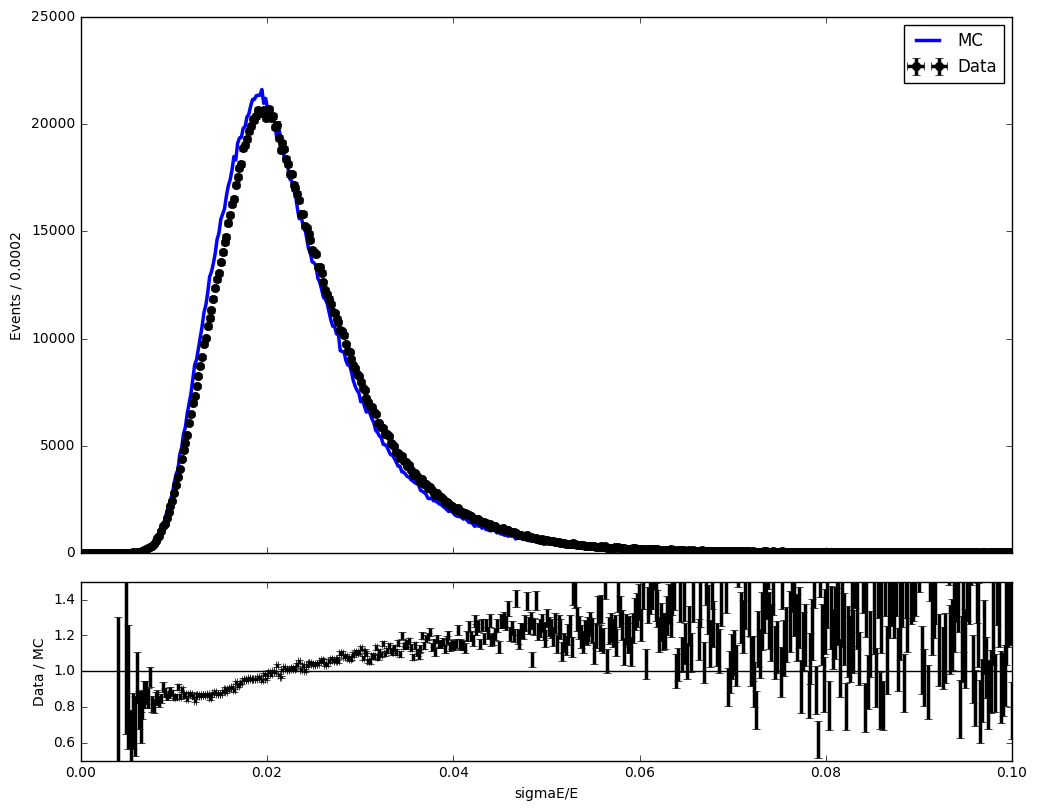

In [17]:
bins = np.linspace(0,0.1,500)
var = 'AfterSSTrSigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEBPhoID,dfmcEBPhoID), (dfEEPhoID,dfmcEEPhoID) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


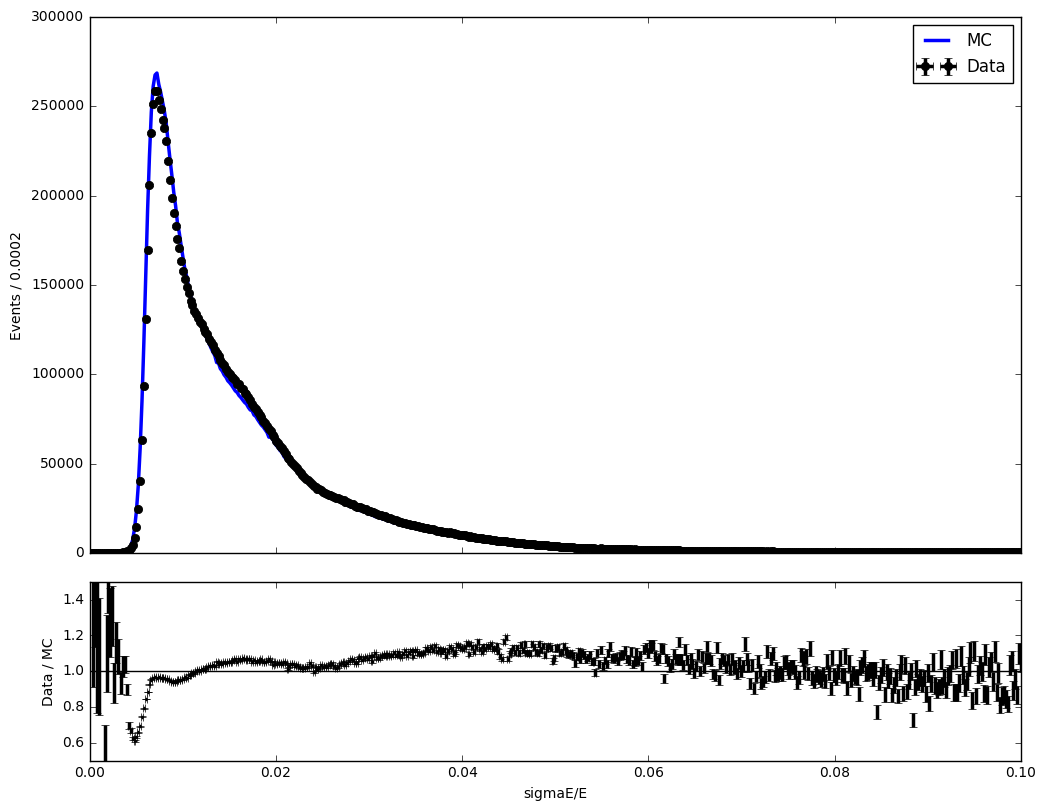

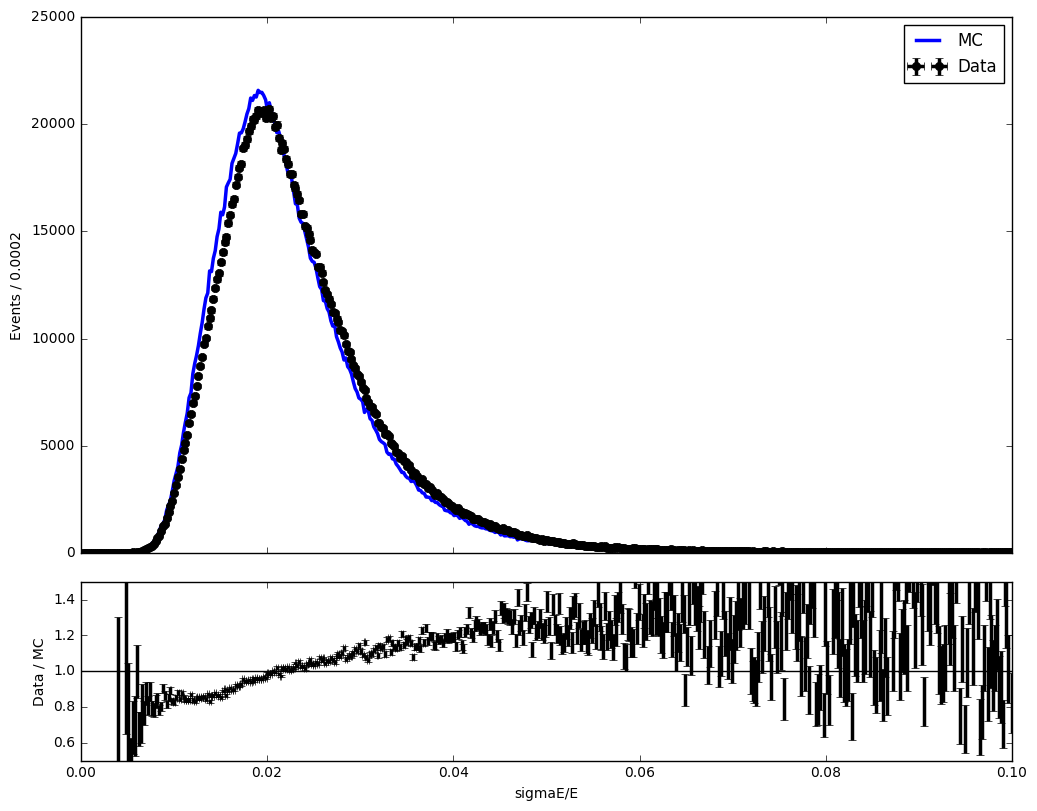

In [18]:
bins = np.linspace(0,0.1,500)
var = 'UnsmearedSigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEBPhoID,dfmcEBPhoID), (dfEEPhoID,dfmcEEPhoID) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


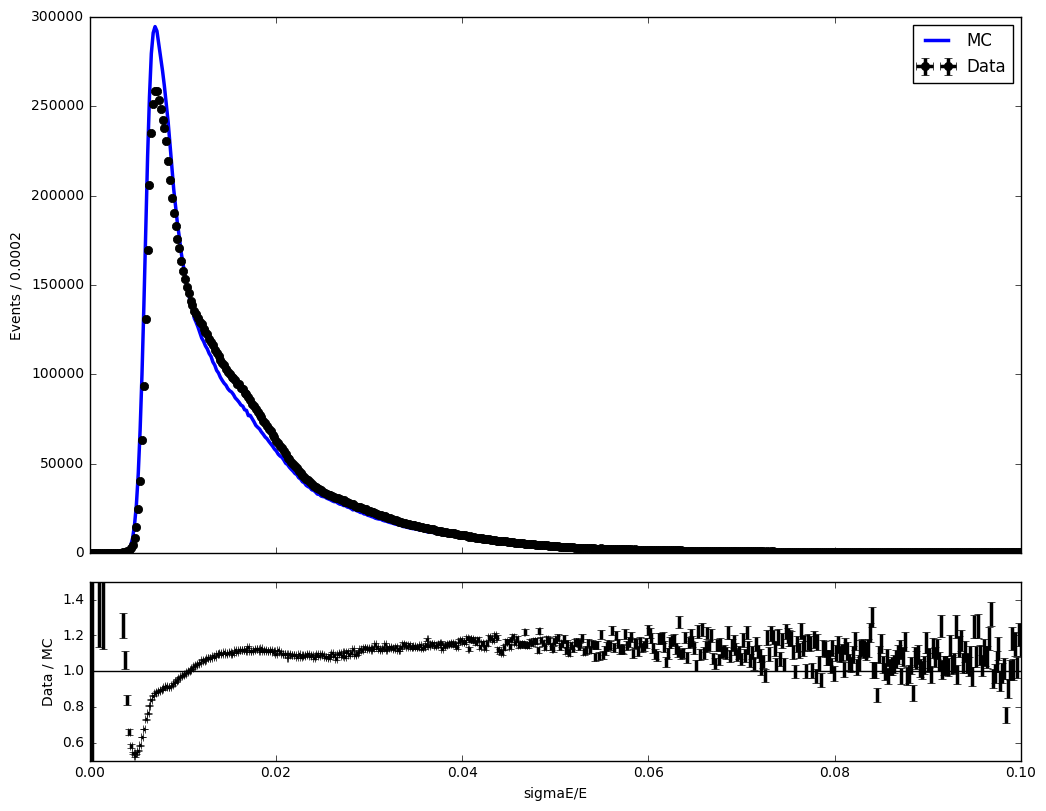

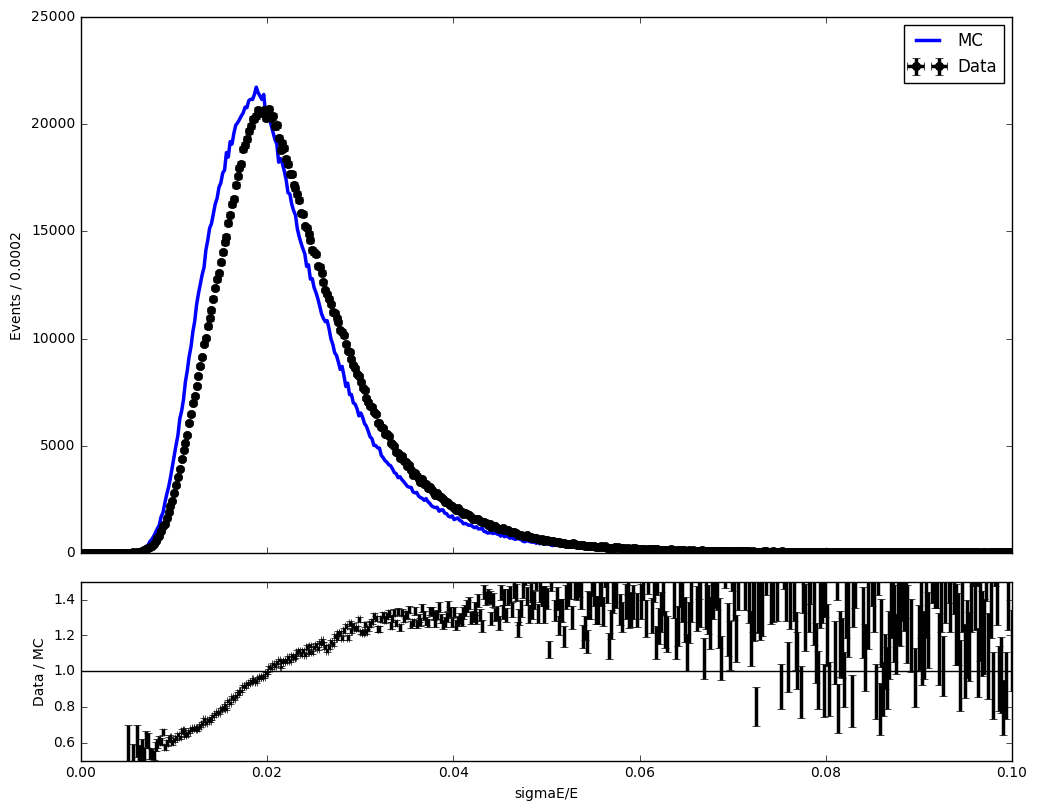

In [19]:
bins = np.linspace(0,0.1,500)
var = 'RecoSigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEBPhoID,dfmcEBPhoID), (dfEEPhoID,dfmcEEPhoID) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


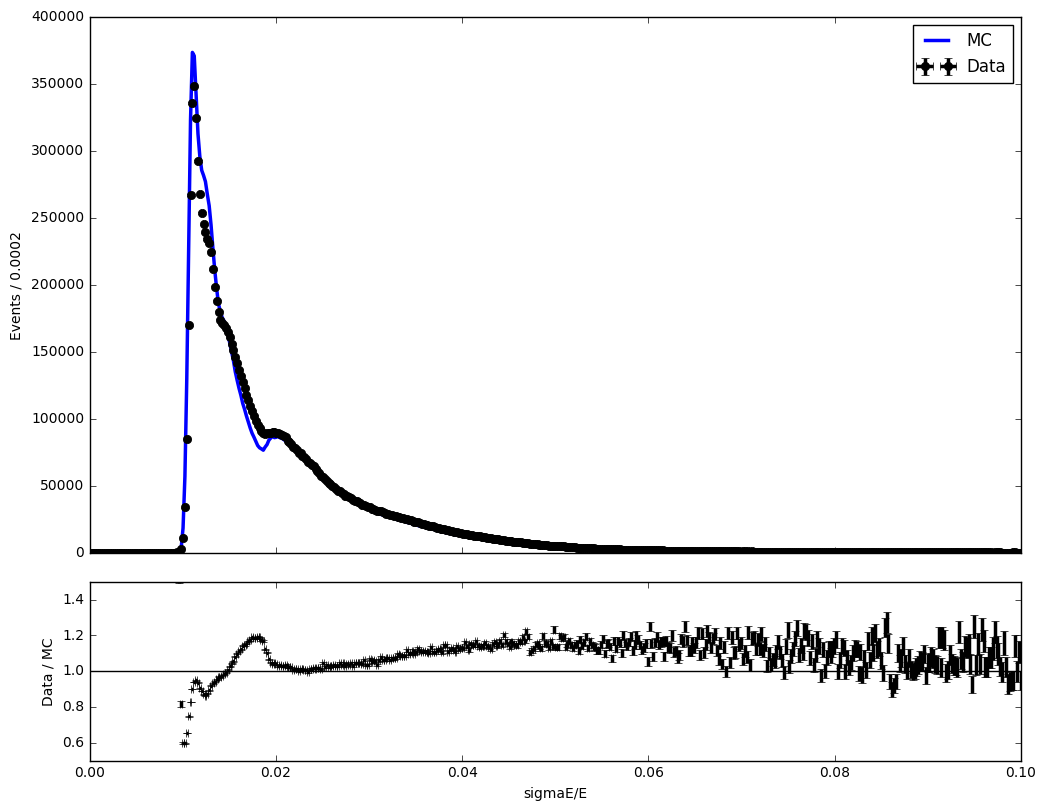

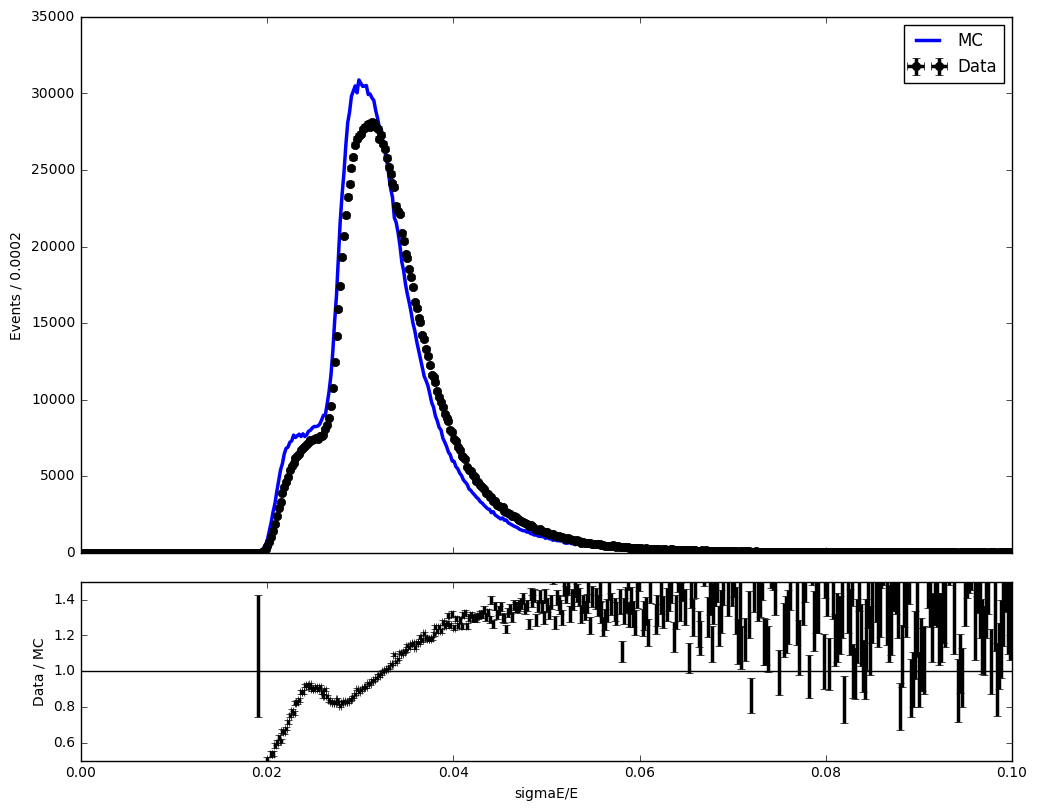

In [20]:
bins = np.linspace(0,0.1,500)
var = 'RecoSigEOverEsmear'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEBPhoID,dfmcEBPhoID), (dfEEPhoID,dfmcEEPhoID) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


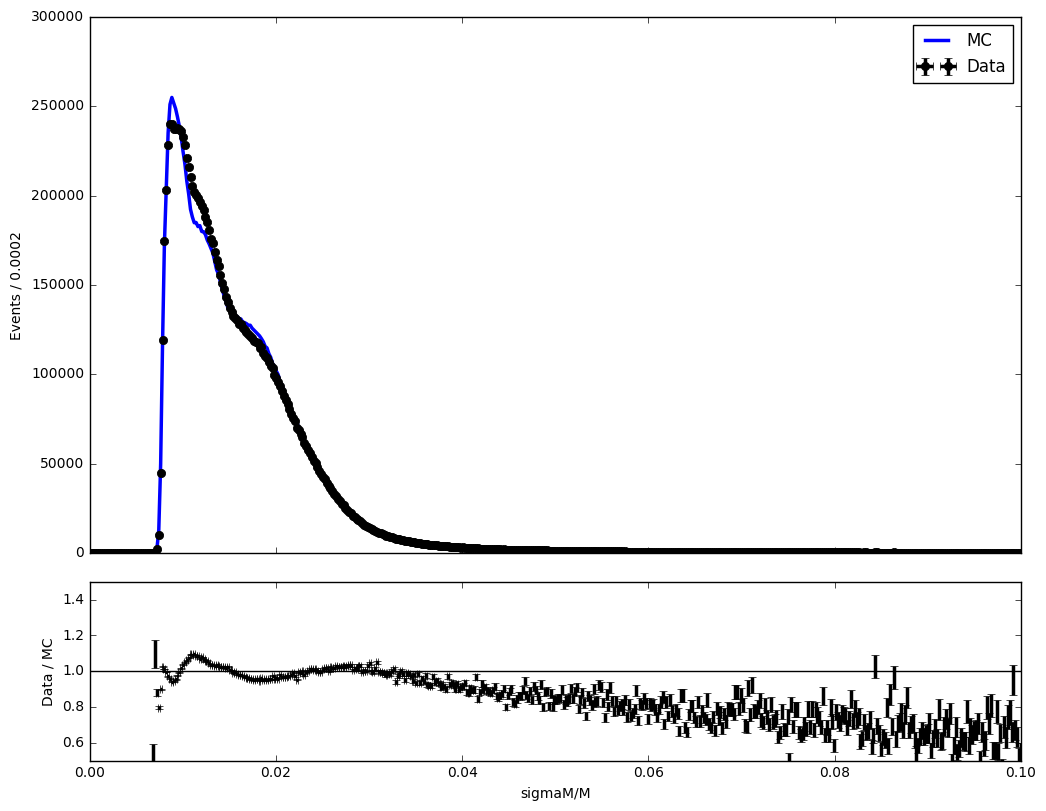

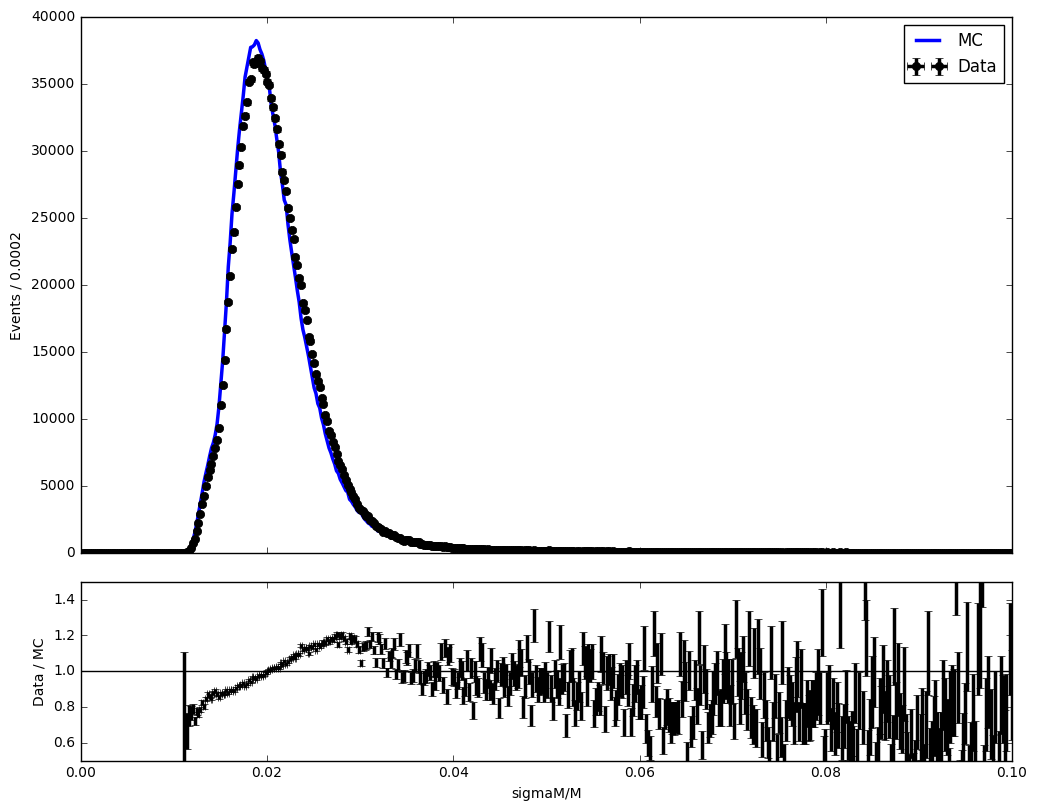

In [21]:
bins = np.linspace(0,0.1,500)
var = 'SigMoM'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEBPhoID,dfmcEBPhoID), (dfEEPhoID,dfmcEEPhoID) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaM/M', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


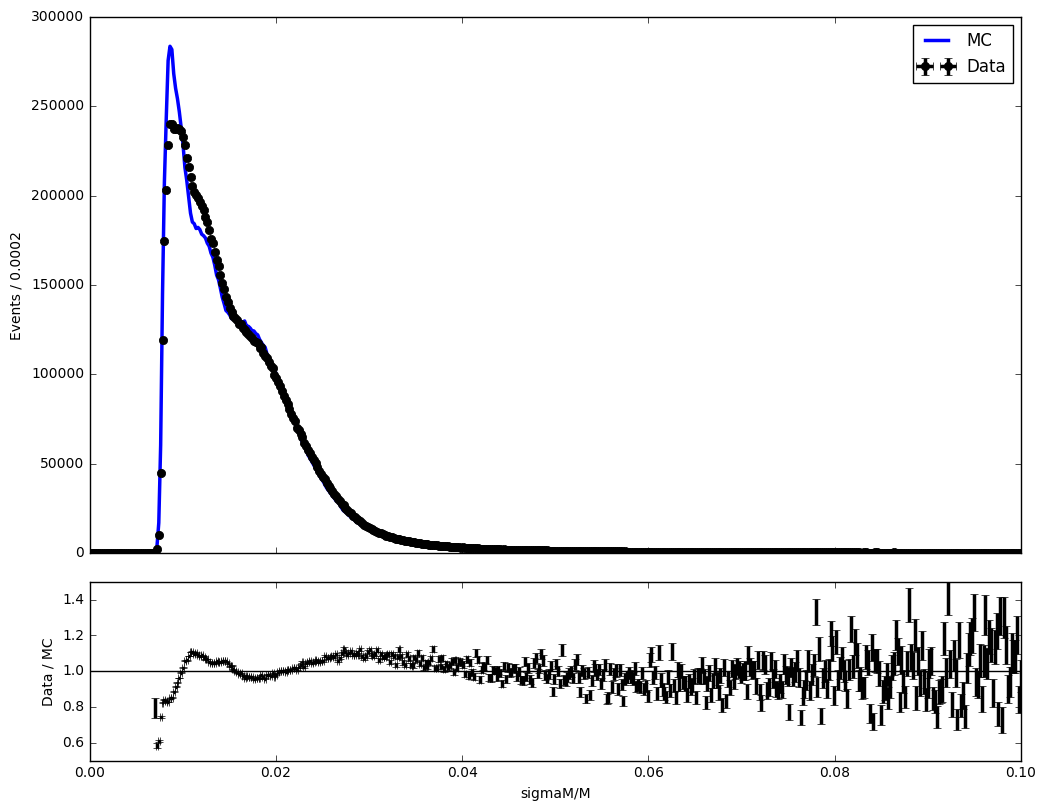

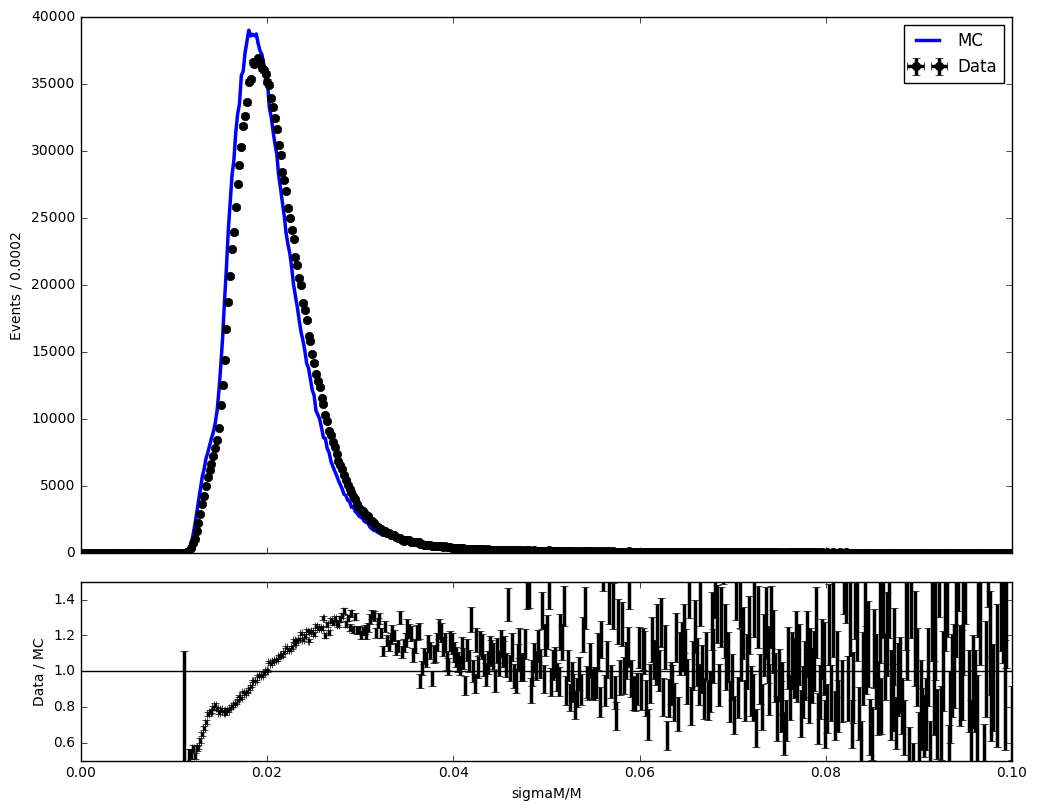

In [22]:
bins = np.linspace(0,0.1,500)
var = 'RecoSigMoM'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEBPhoID,dfmcEBPhoID), (dfEEPhoID,dfmcEEPhoID) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaM/M', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


Run :  271036 271658


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Run :  272007 275376
Run :  275657 276283
Run :  276315 276811
Run :  276831 277420
Run :  277772 278808
Run :  278820 280385
Run :  280919 284044


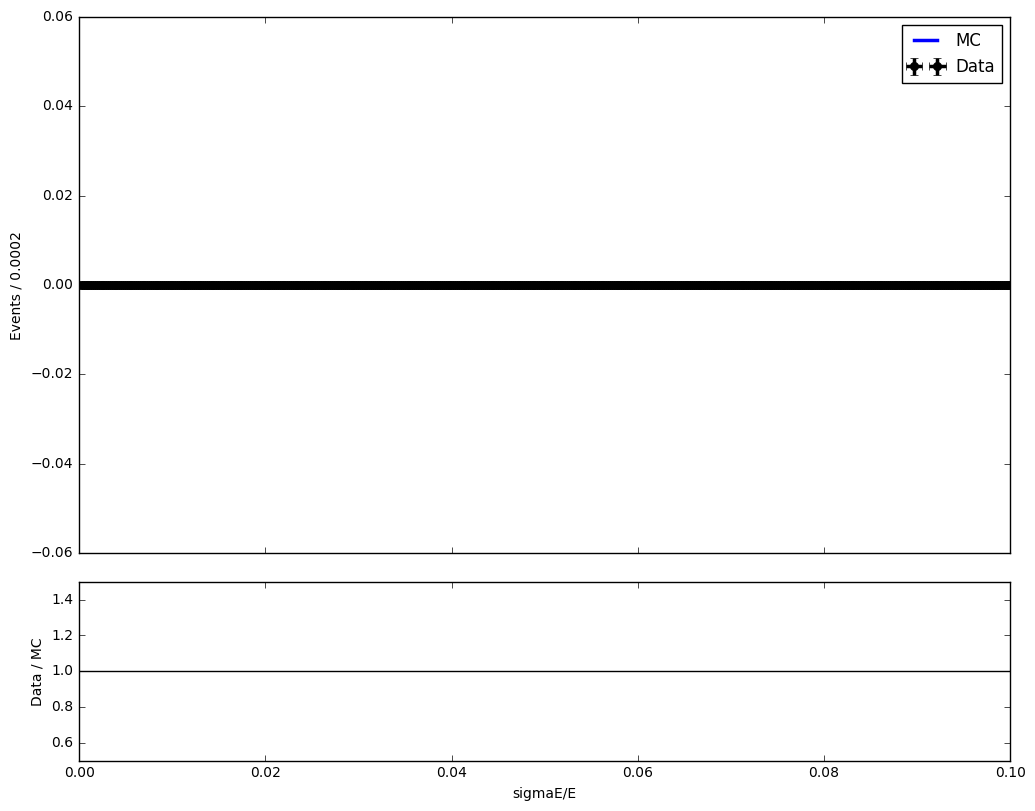

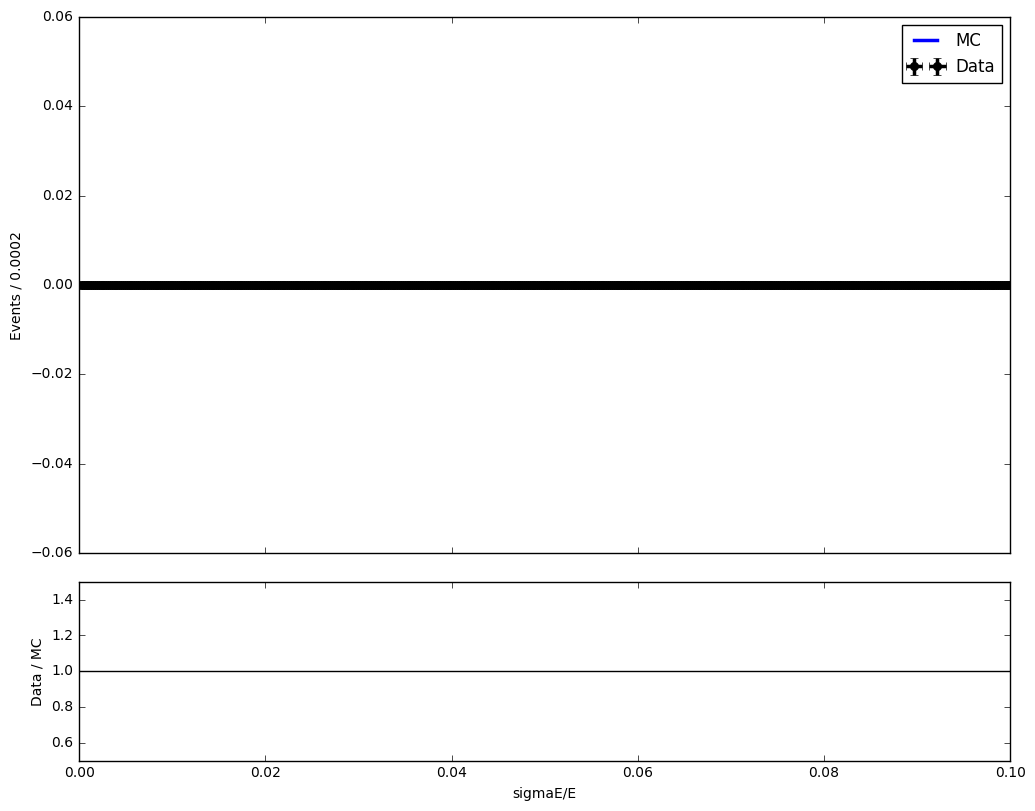

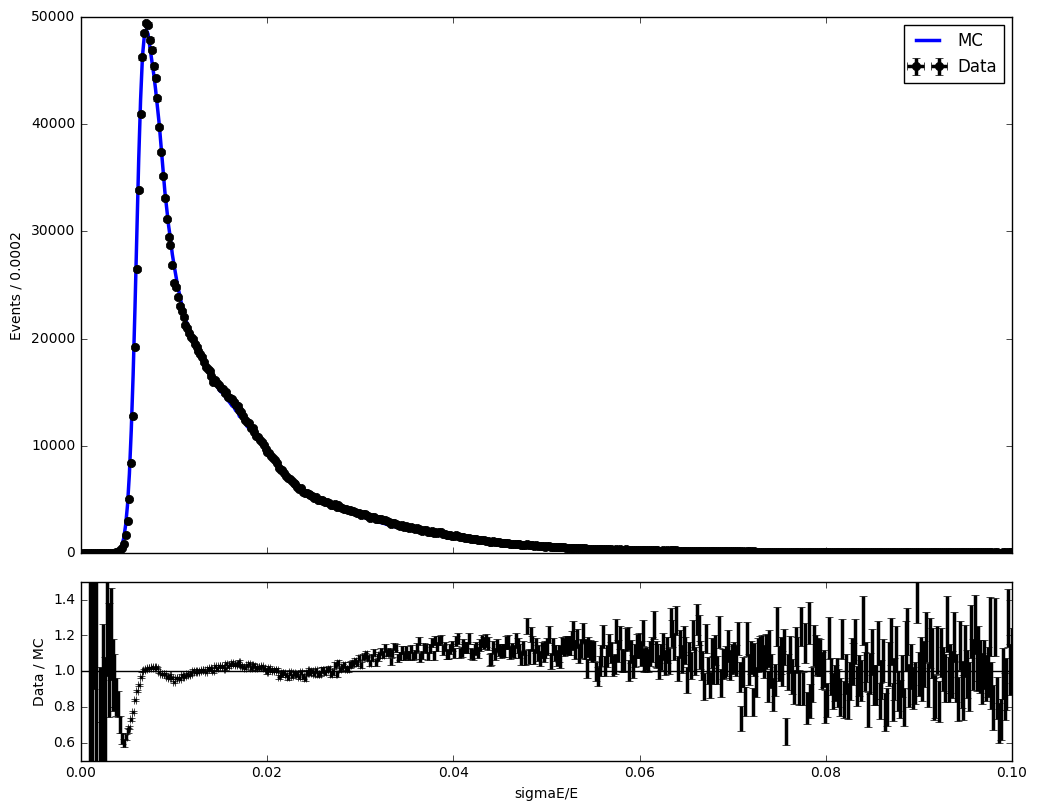

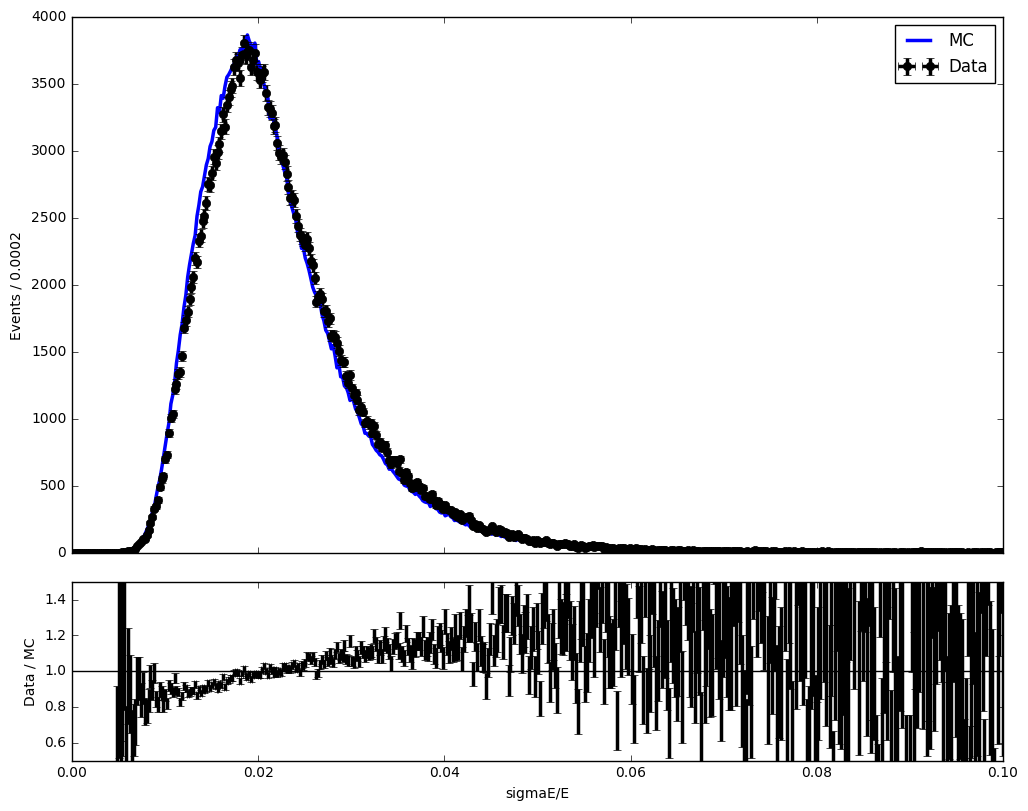

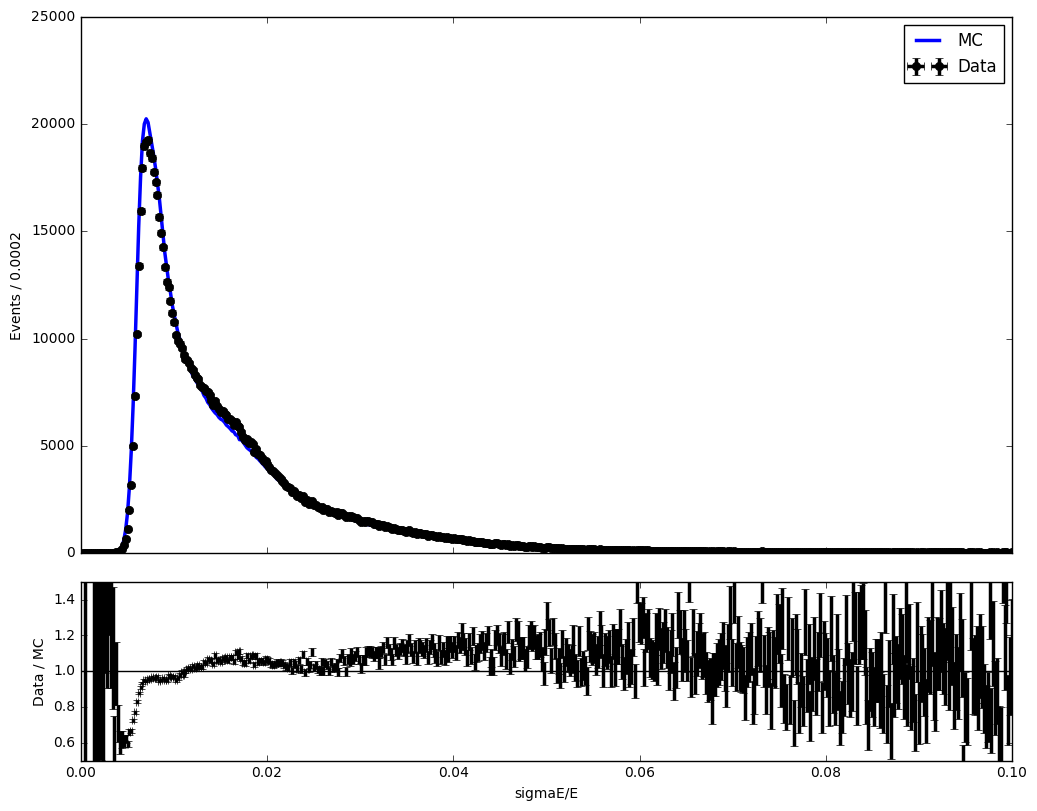

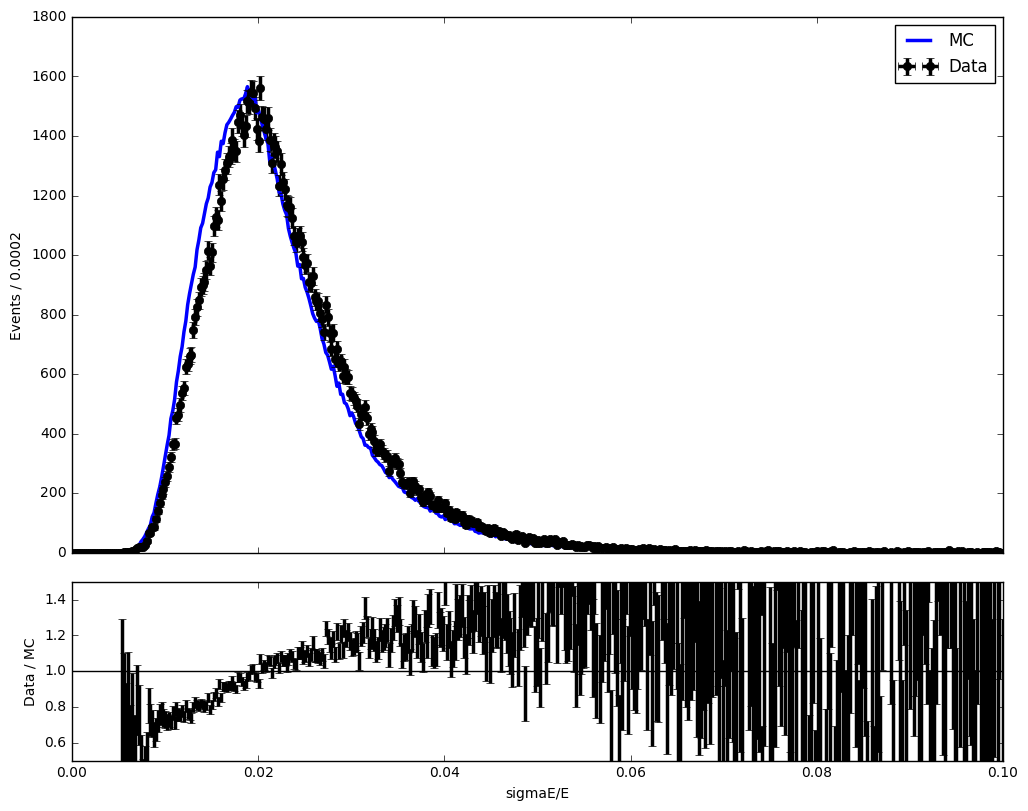

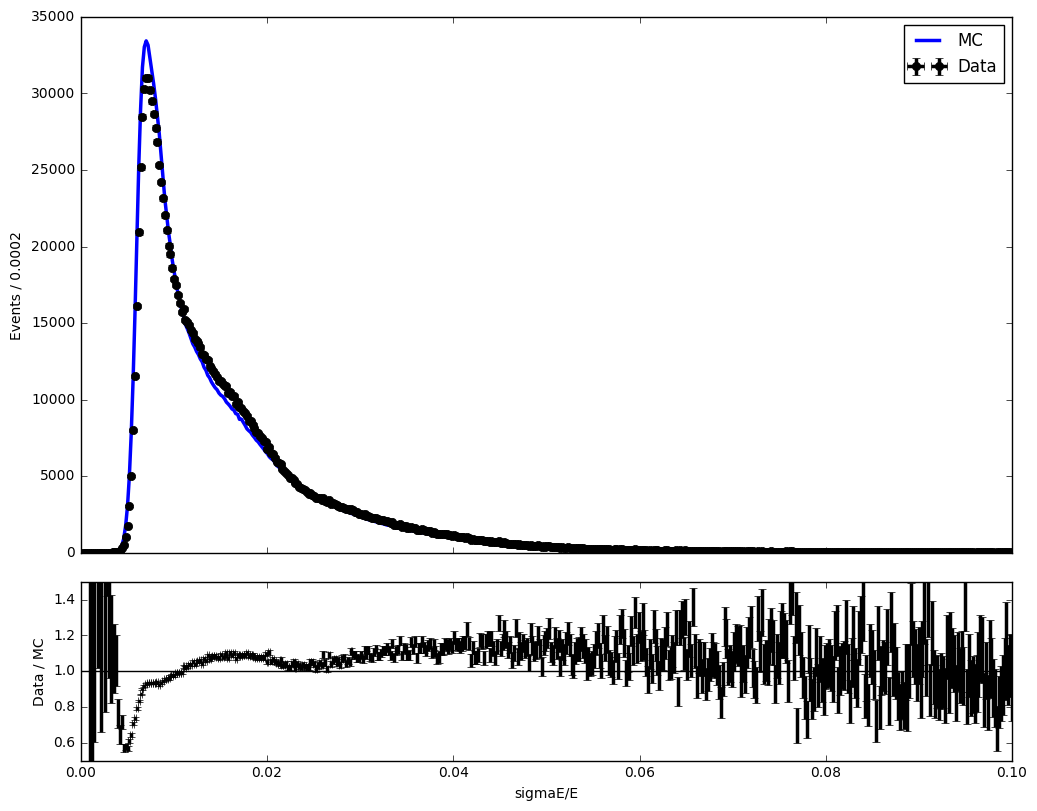

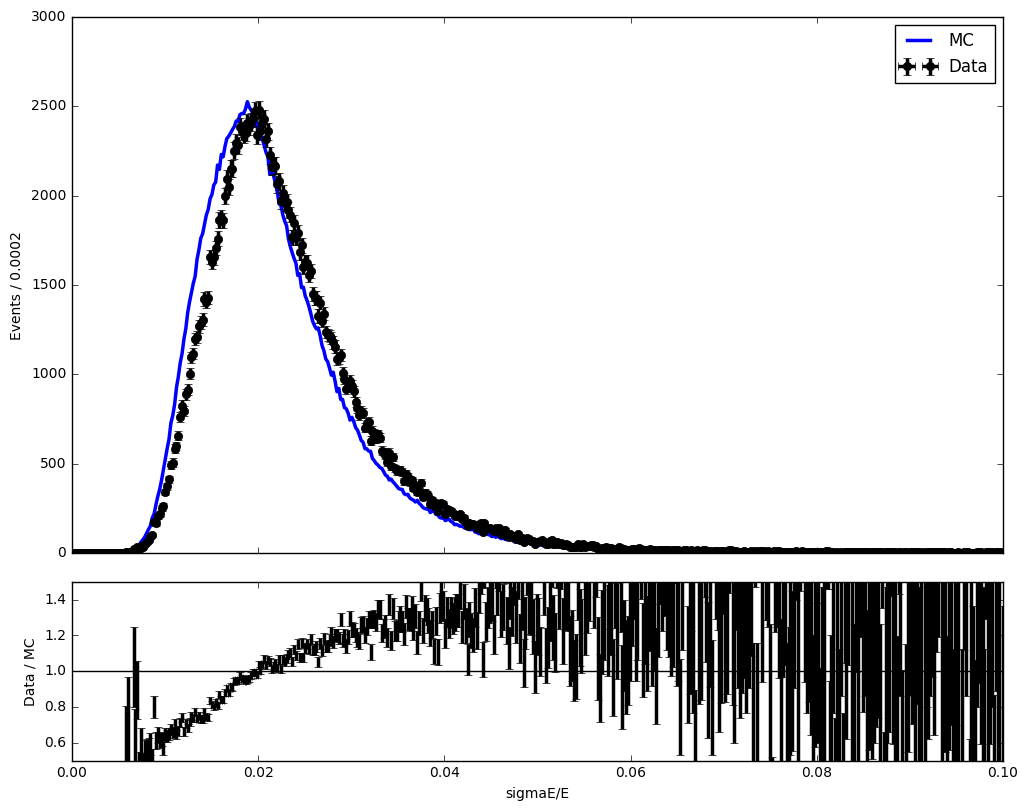

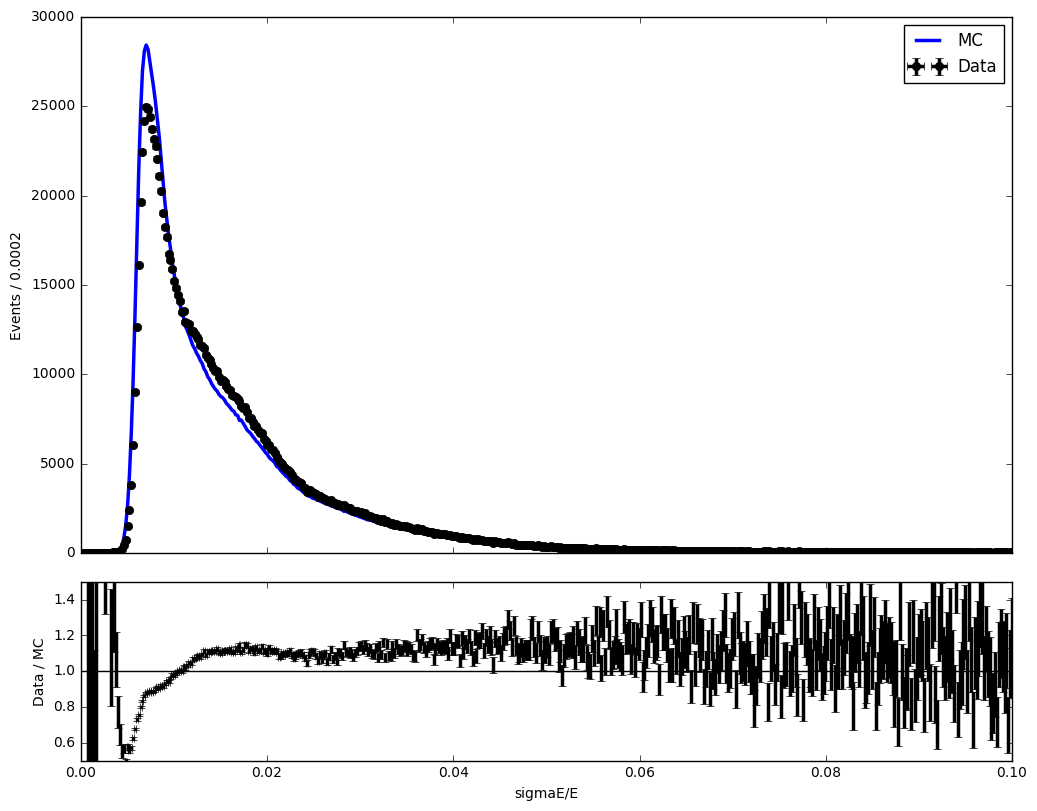

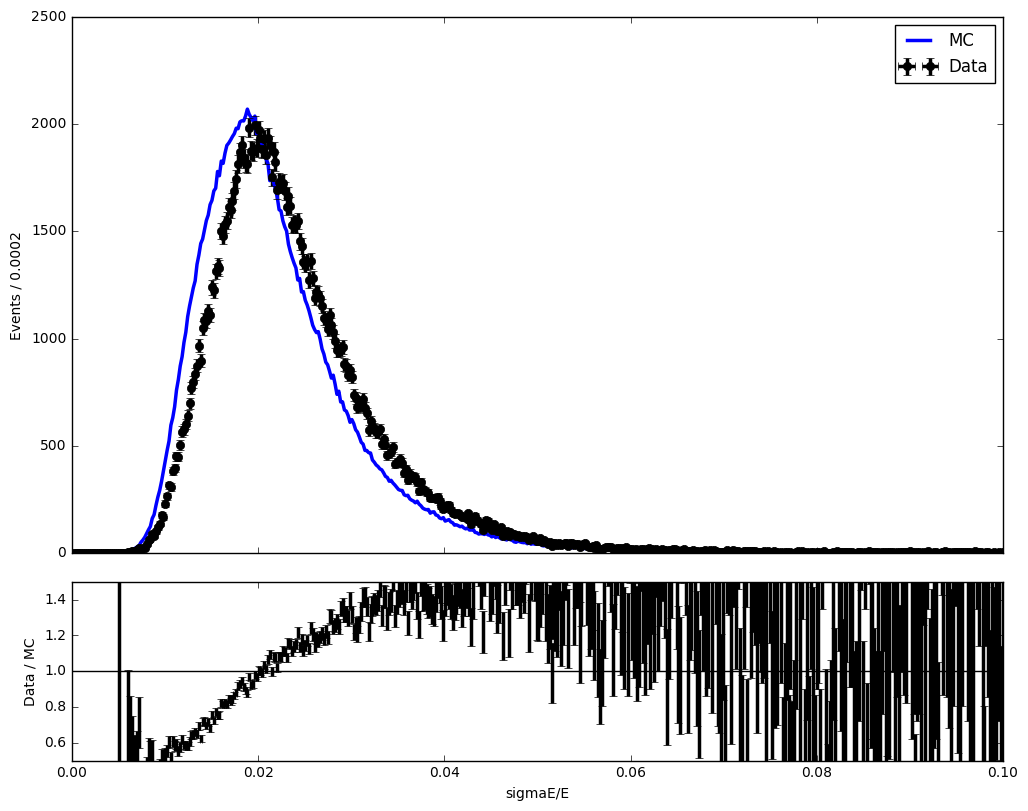

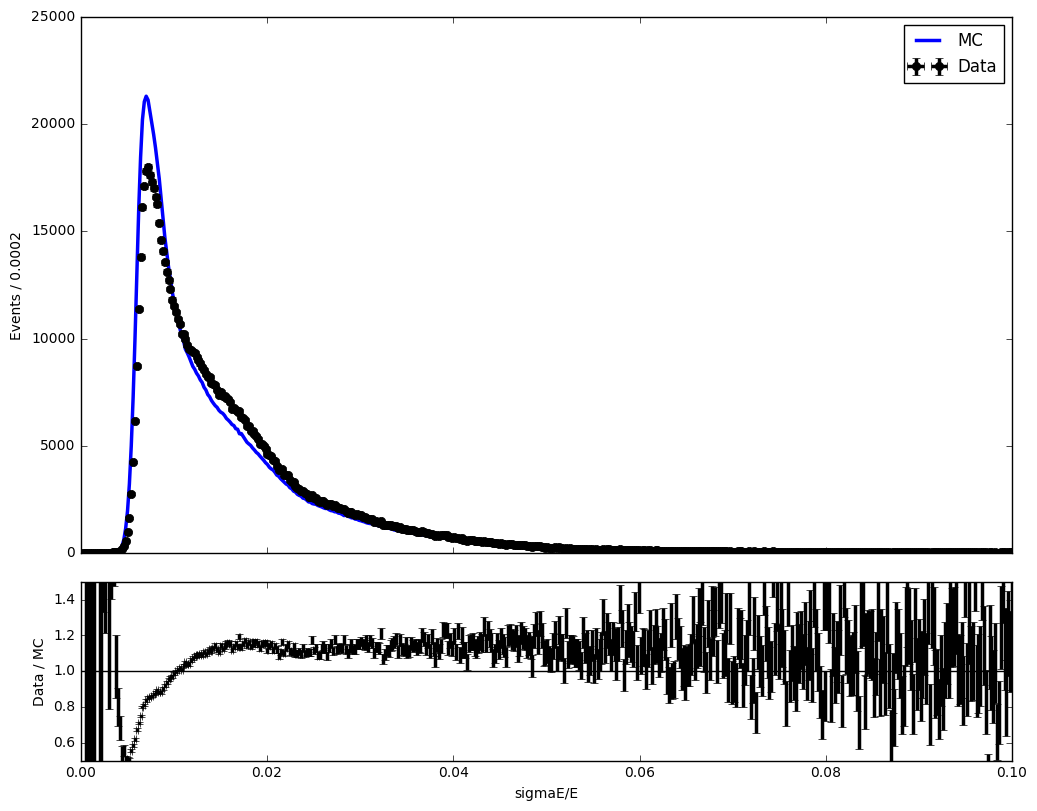

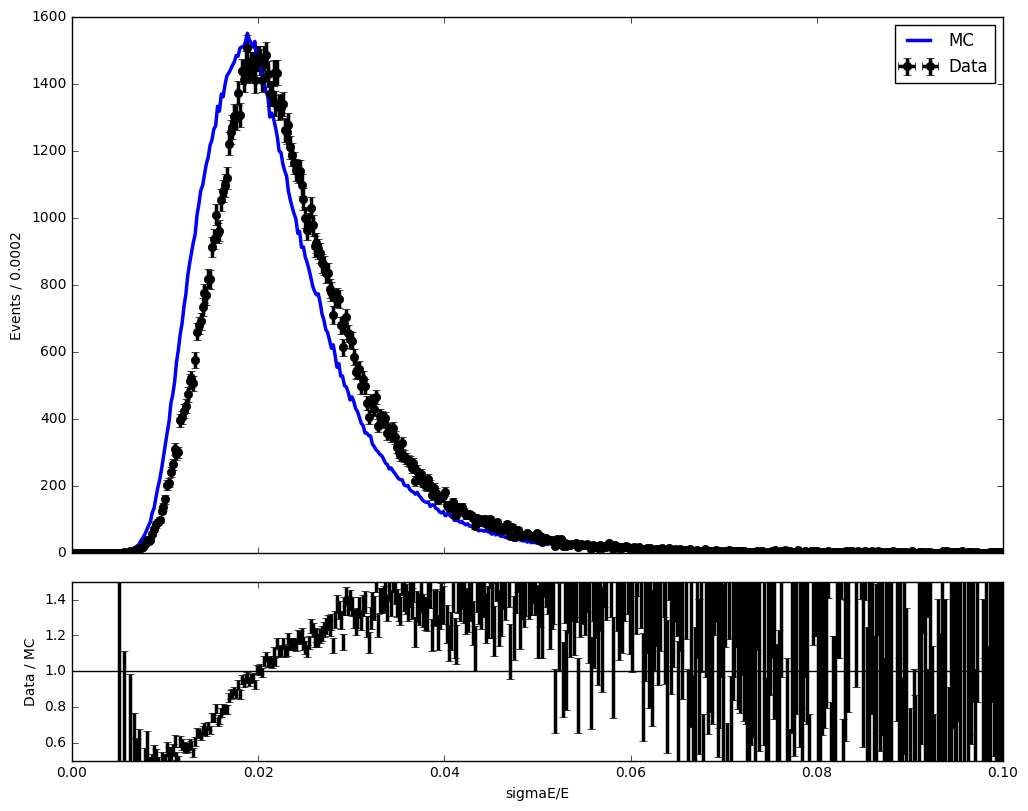

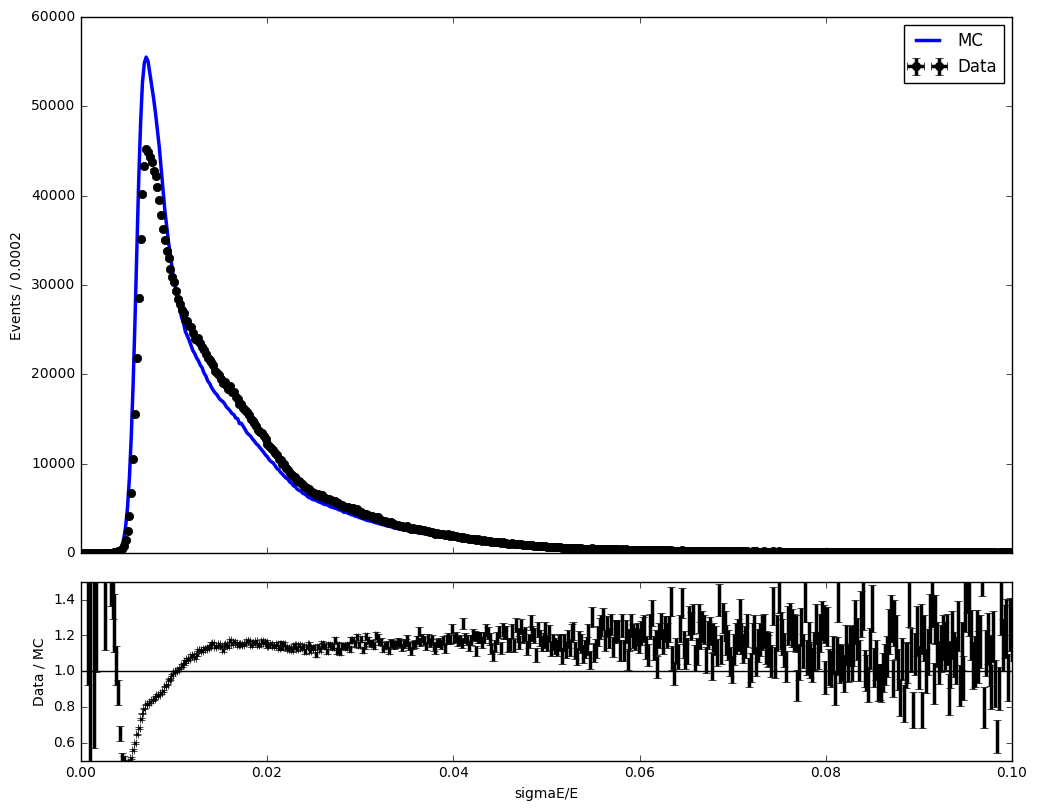

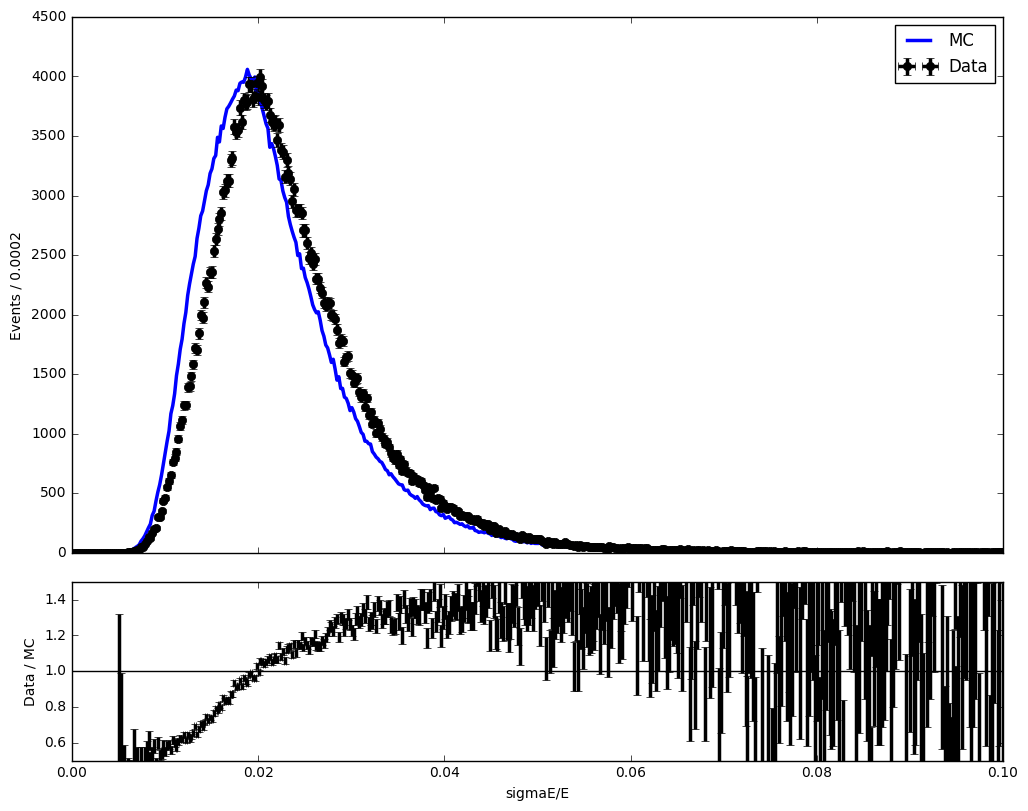

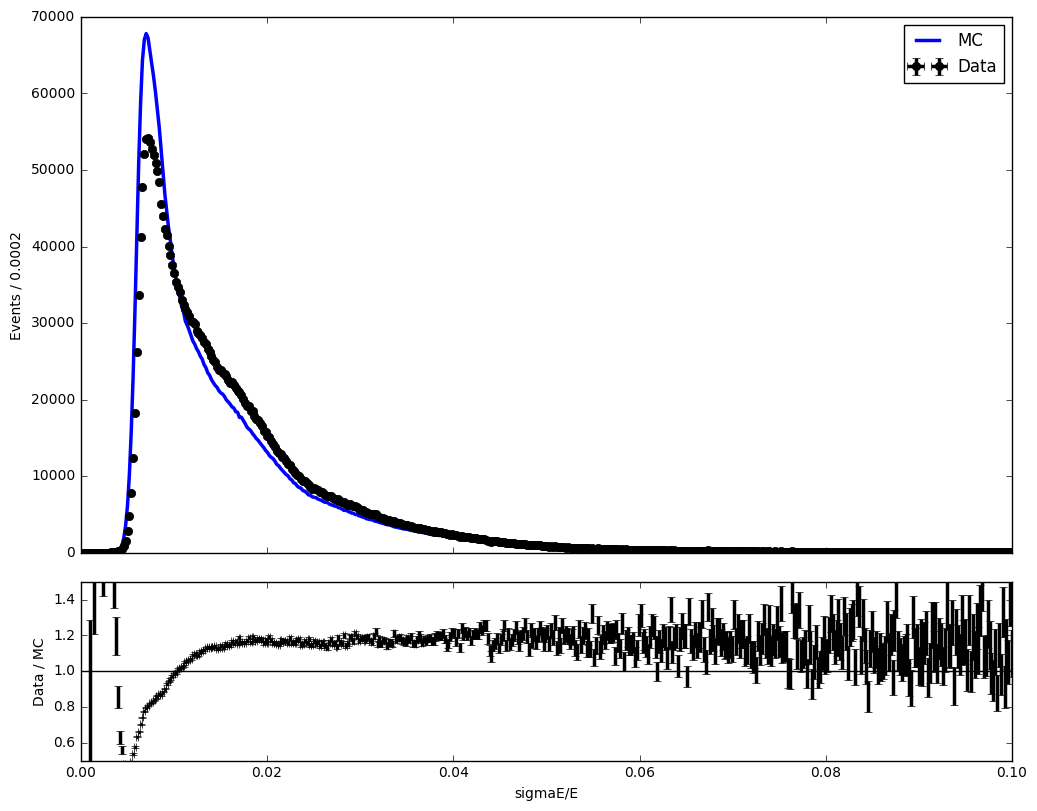

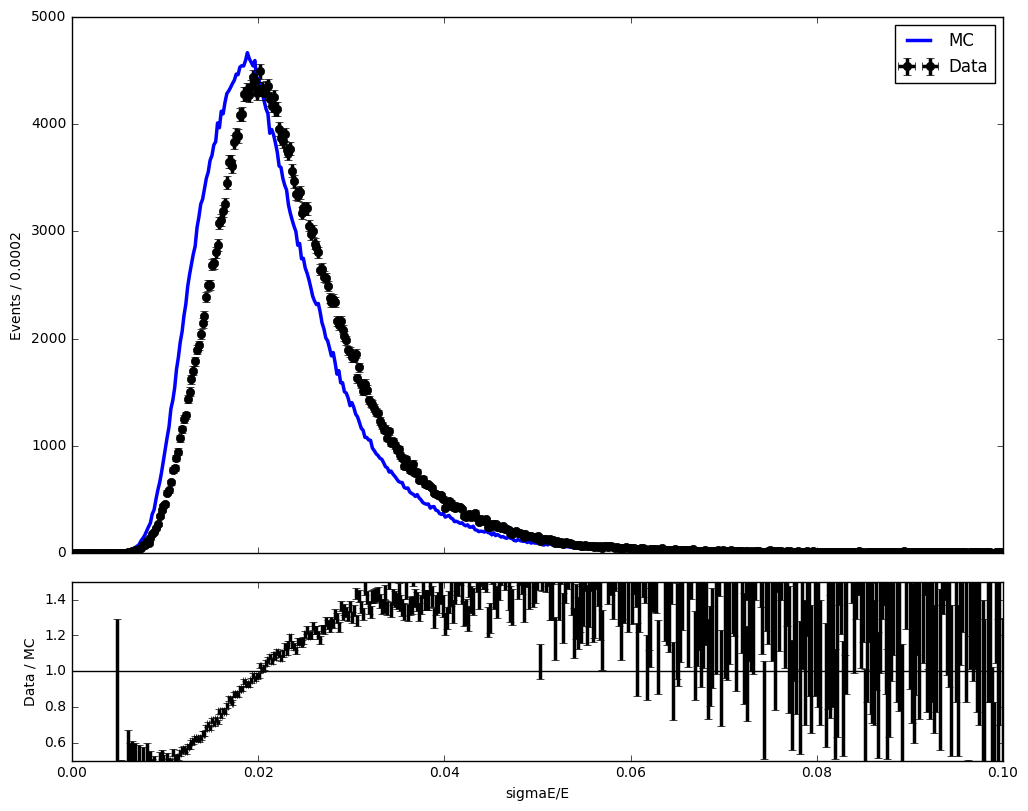

In [23]:
bins = np.linspace(0,0.1,500)
var = 'RecoSigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

runs = [(271036, 271658 ), 
        (272007, 275376 ),
        (275657, 276283 ),
        (276315, 276811 ),
        (276831, 277420 ),
        (277772, 278808 ),
        (278820, 280385 ),
        (280919, 284044 )       
       ]

for rr in runs:
    print "Run : ",rr[0], rr[1]
    dfEBPhoIDRuns     = df  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and PhoIDMVA > 0.32 and '+ str(rr[0]) + ' <run and run< ' + str(rr[1]))
    dfEEPhoIDRuns     = df  .query('(ScEta < -1.57 or ScEta >1.57)     and (mass > 70 and mass < 110) and PhoIDMVA > 0.32 and '+ str(rr[0]) + ' <run and run< ' + str(rr[1]) +'and R9>0.8') 

    for dfs in [ (dfEBPhoIDRuns,dfmcEBPhoID), (dfEEPhoIDRuns,dfmcEEPhoID) ]: 
        data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
        draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


In [24]:
# plt.hist( df.query('abs(ScEta) < 1.5').UnsmearedSigEOverE / df.query('abs(ScEta)<1.5').AfterSSTrSigEOverE, bins=np.linspace(0.5,1.5,101), log='y' );

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


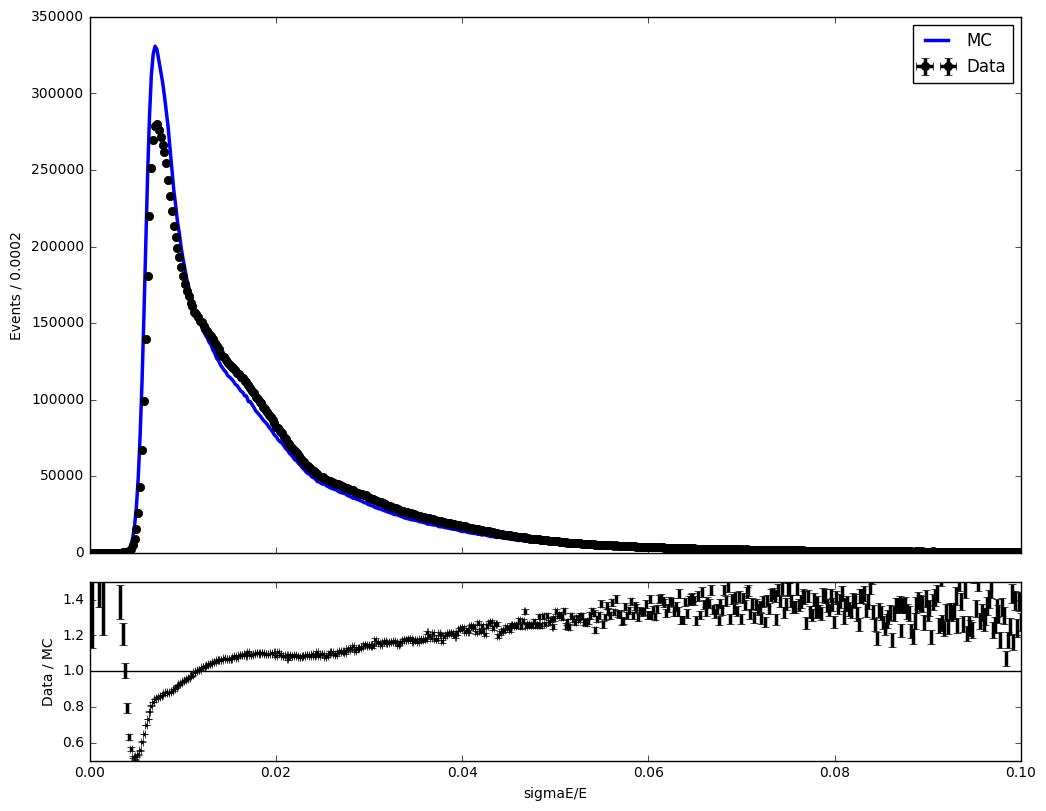

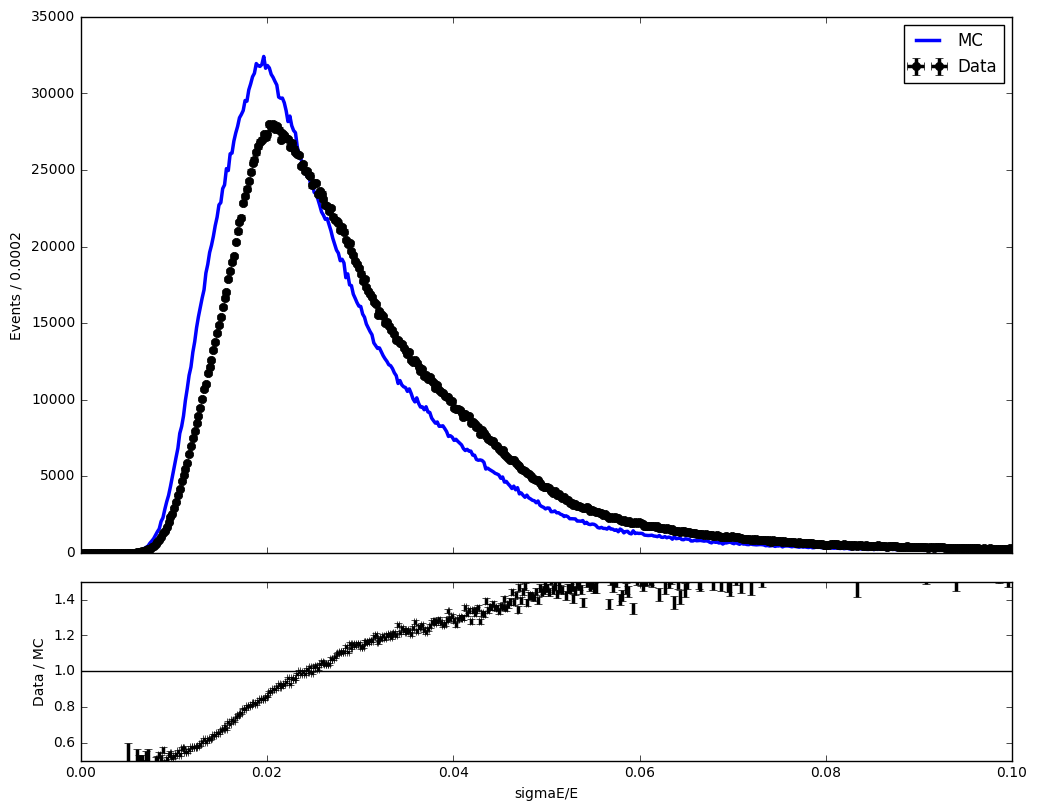

In [25]:
bins = np.linspace(0,0.1,500)
var = 'RecoSigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


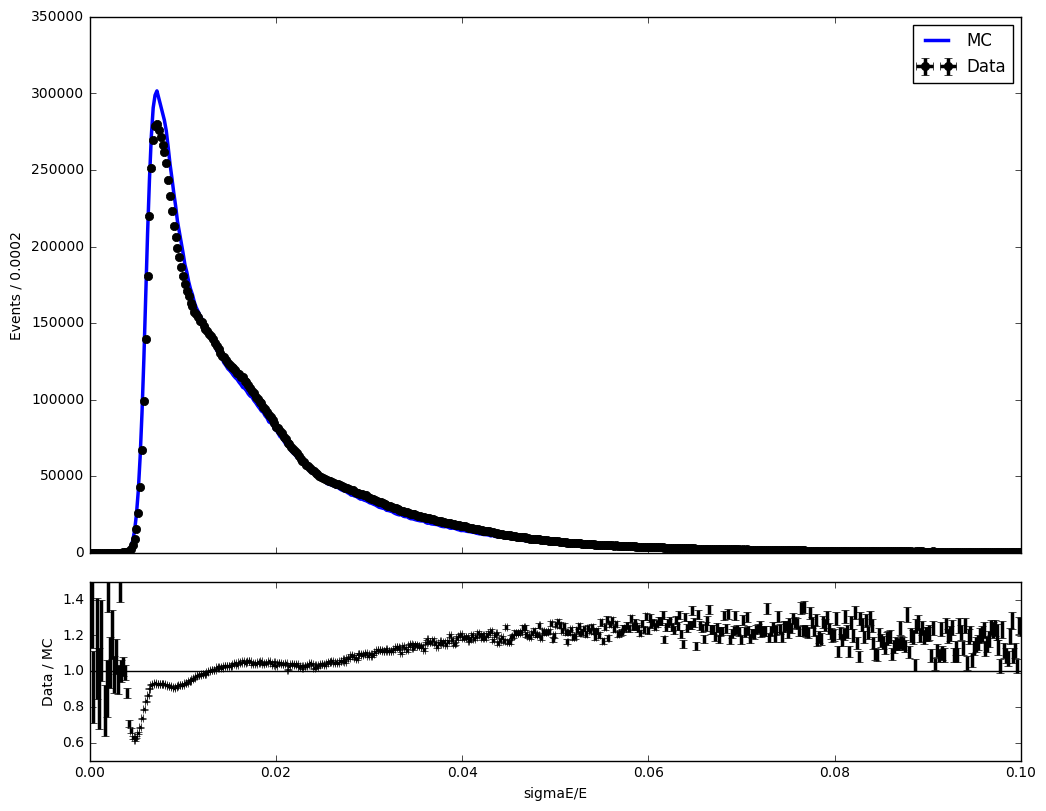

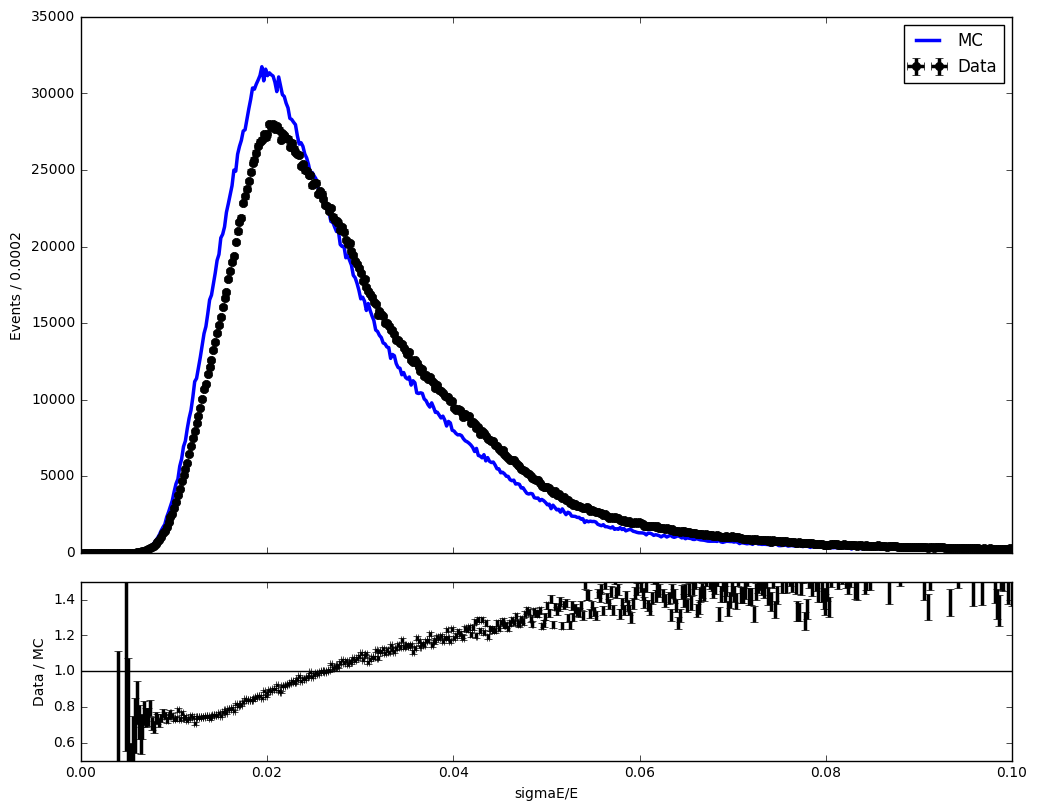

In [26]:
bins = np.linspace(0,0.1,500)
var = 'AfterSSTrSigEOverE'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels, weight=None)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='sigmaE/E', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), ylim=(0.5,1.5))


Plotting  RecoSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  AfterSSTrSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


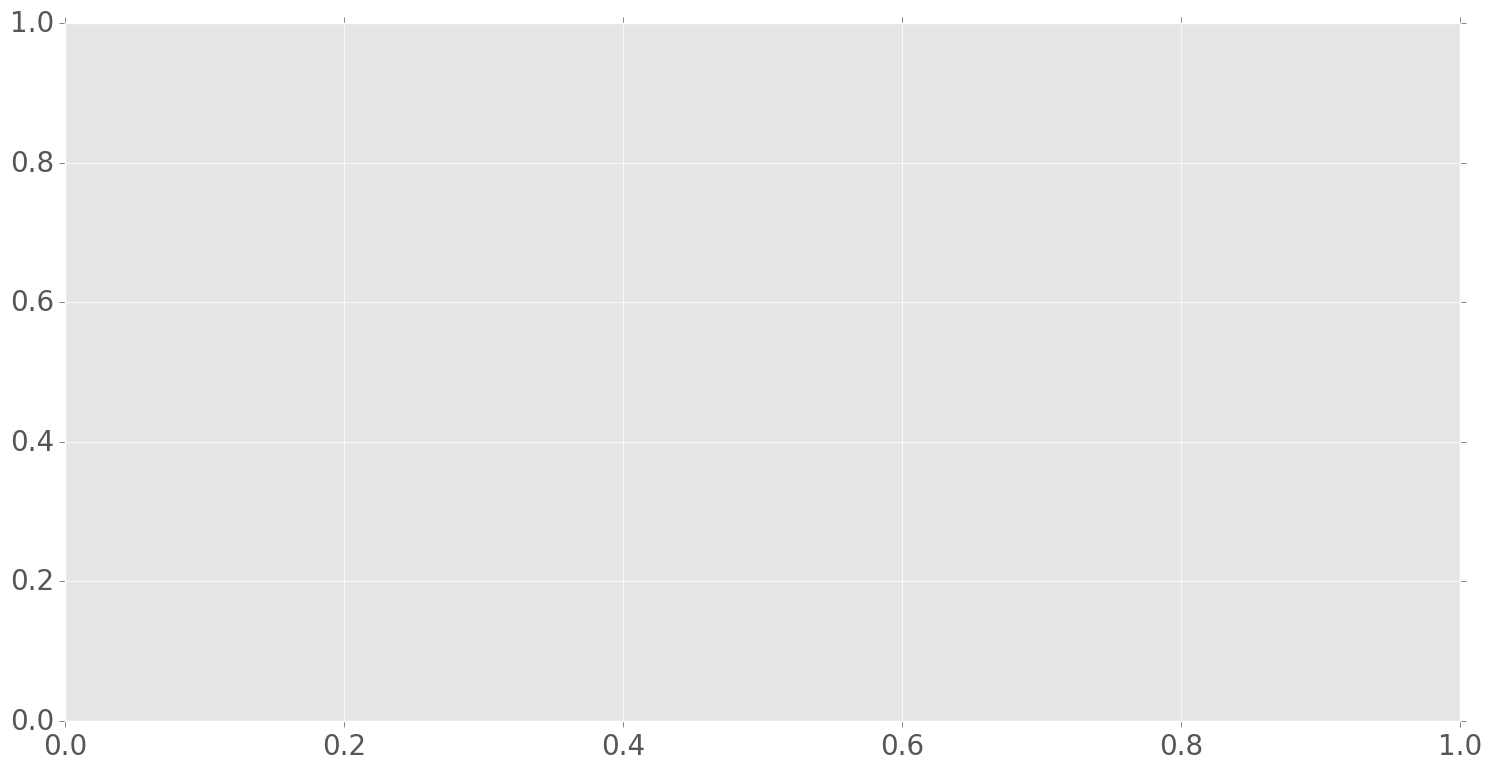

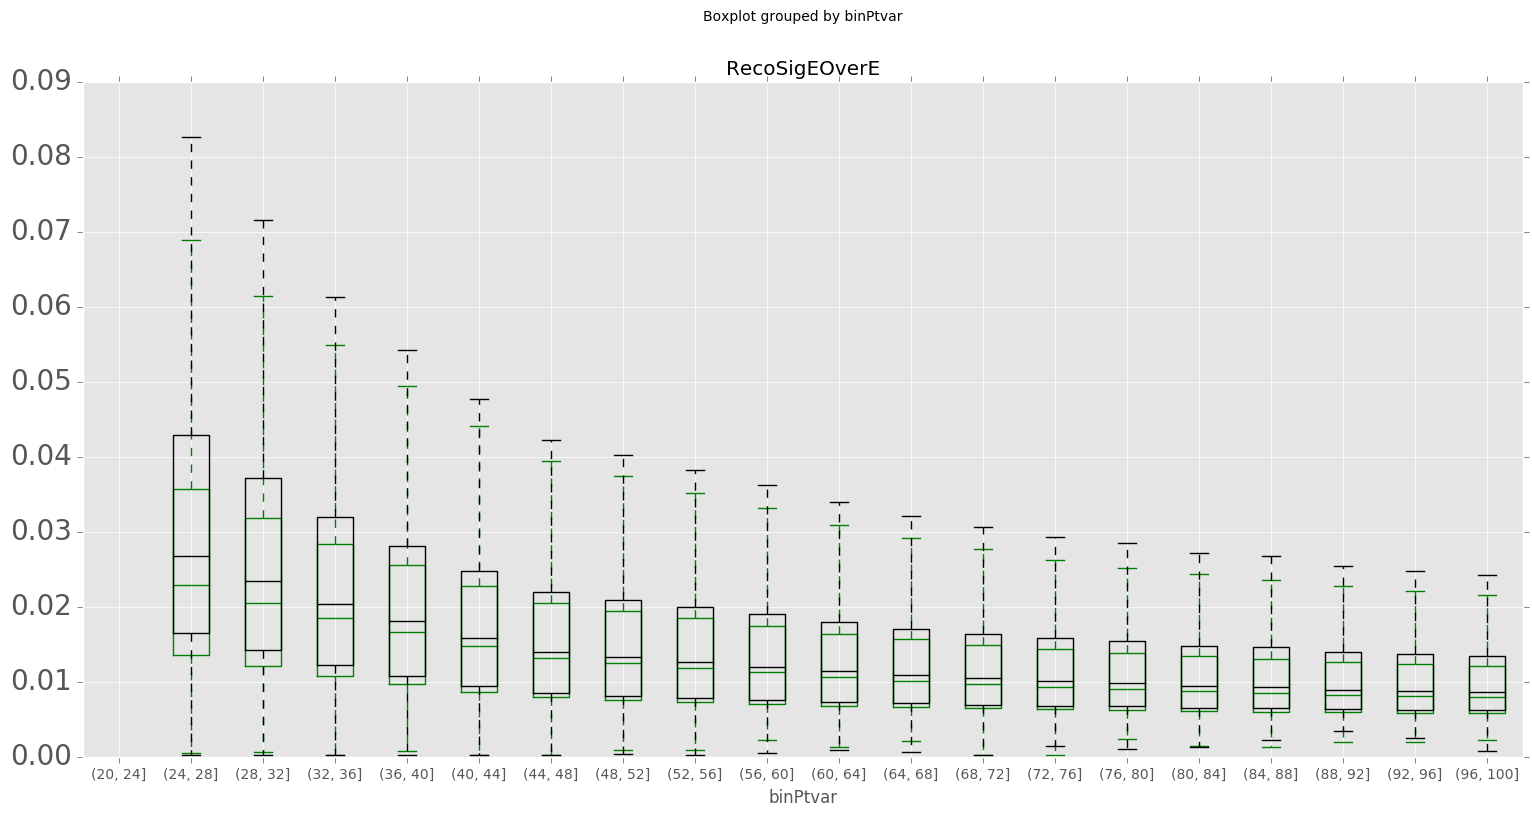

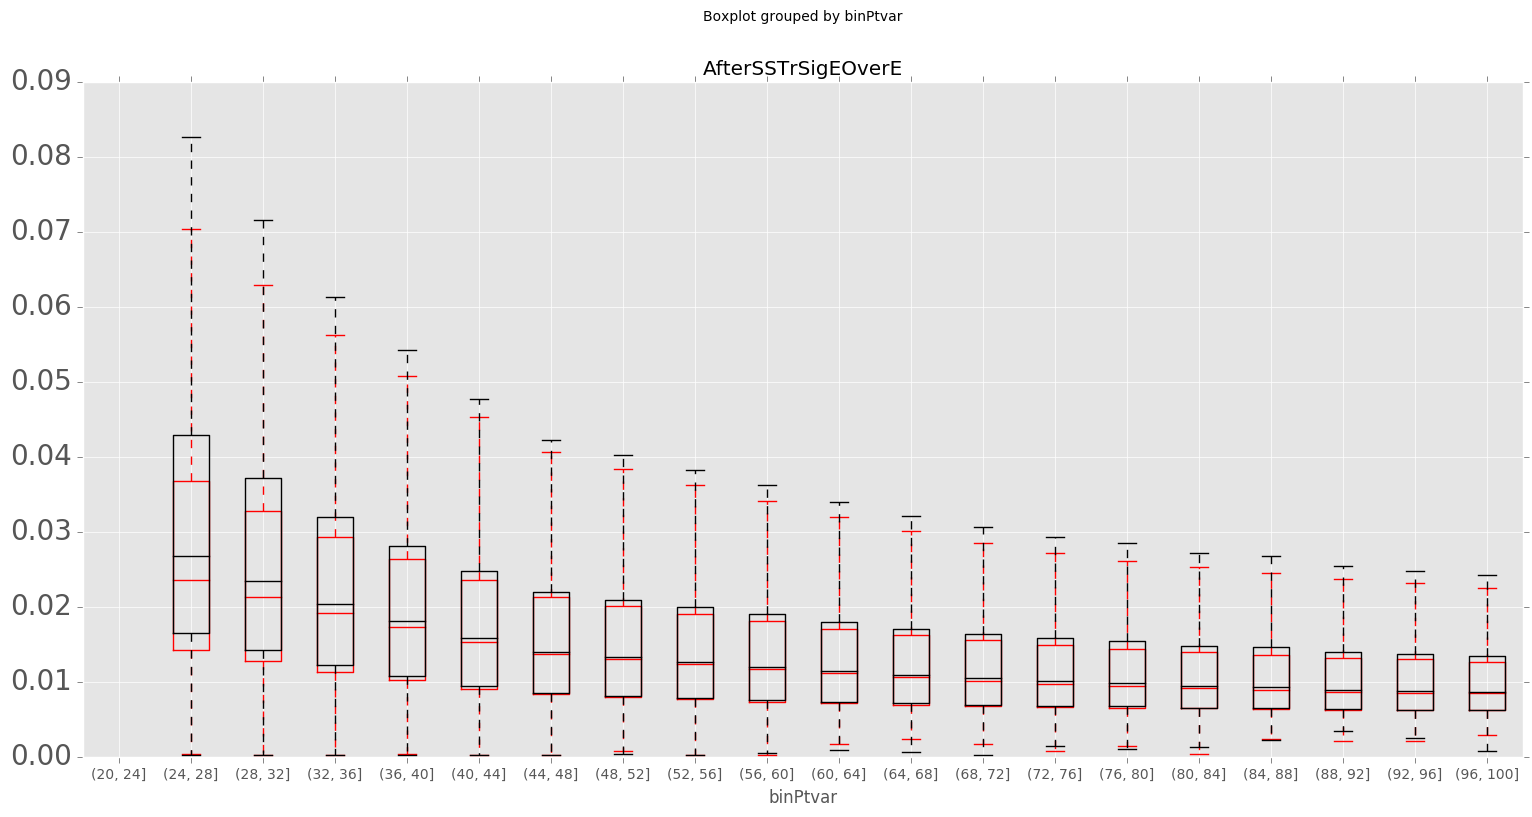

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)

bins = np.linspace(20,100, 21)
bins = np.linspace(20,100, 21)

ylist     = ["RecoSigEOverE"     ]
ylistcorr = ["AfterSSTrSigEOverE"]

for i in xrange(len(ylist)):
    
    y = ylist[i]    
    print "Plotting ", y
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)

    dfmc['binPtvar'] = pd.cut(dfmc["Pt"], bins)
    bpmc = dfmc.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('g') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    df['binPtvar'] = pd.cut(df["Pt"], bins)
    bpdata = df.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('black') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    plt.savefig('datamc_sEoE_vs_Pt.png')

    
    ###
    ycorr = ylistcorr[i]
    print "Plotting ", ycorr
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)

    dfmc['binPtvar'] = pd.cut(dfmc["Pt"], bins)
    bpmccorr = dfmc.boxplot(column=ycorr,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('r') for item in bpmccorr[key]['medians']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['boxes']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['whiskers']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['caps']] for key in bpmccorr.keys()]
    df['binPtvar'] = pd.cut(df["Pt"], bins)
    bpdata = df.boxplot(column=ycorr,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('black') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    plt.savefig('datamccorr_sEoE_vs_Pt.png')

Plotting  RecoSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  AfterSSTrSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  RecoSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  AfterSSTrSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  RecoSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  AfterSSTrSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


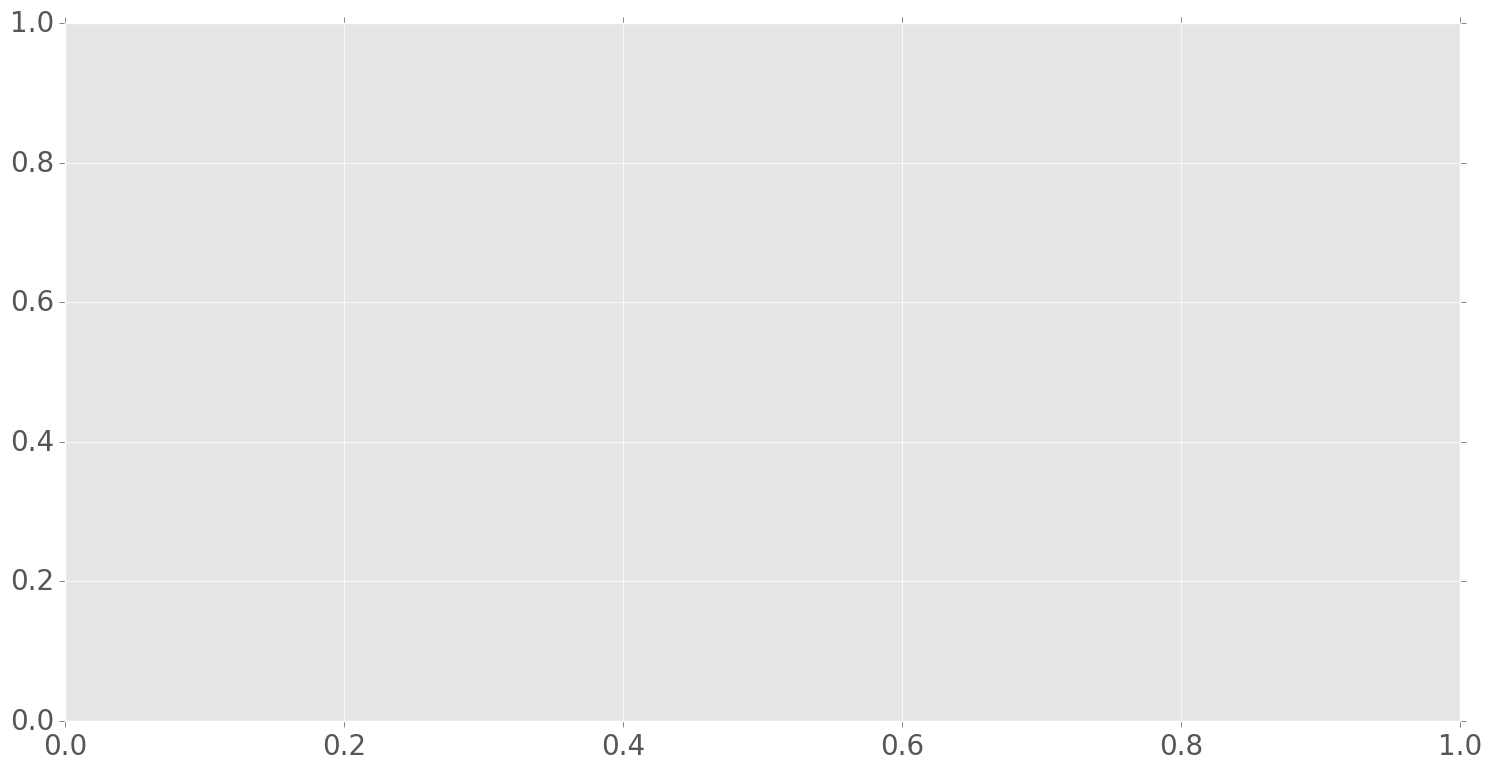

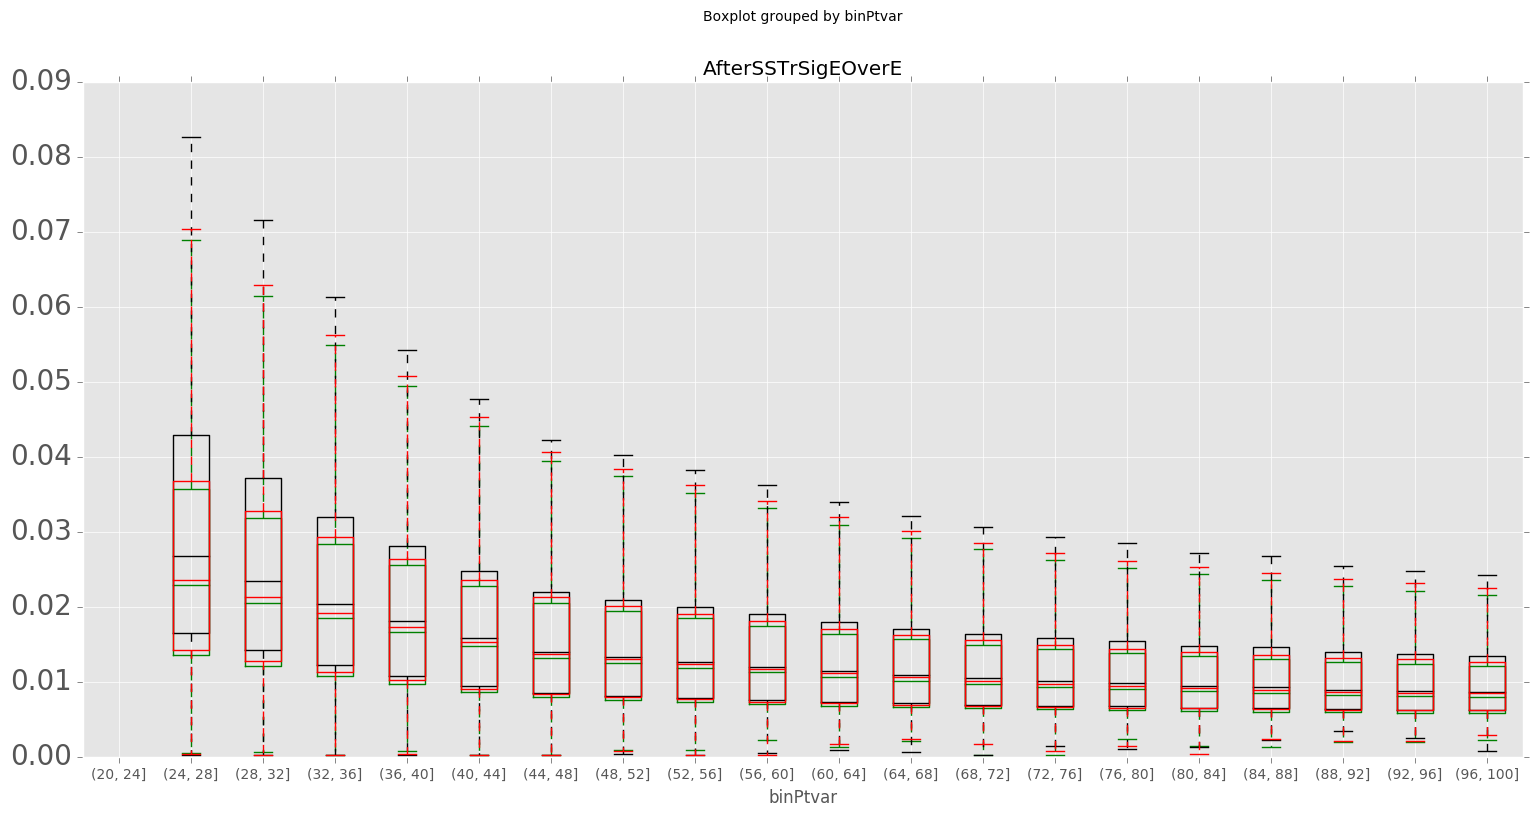

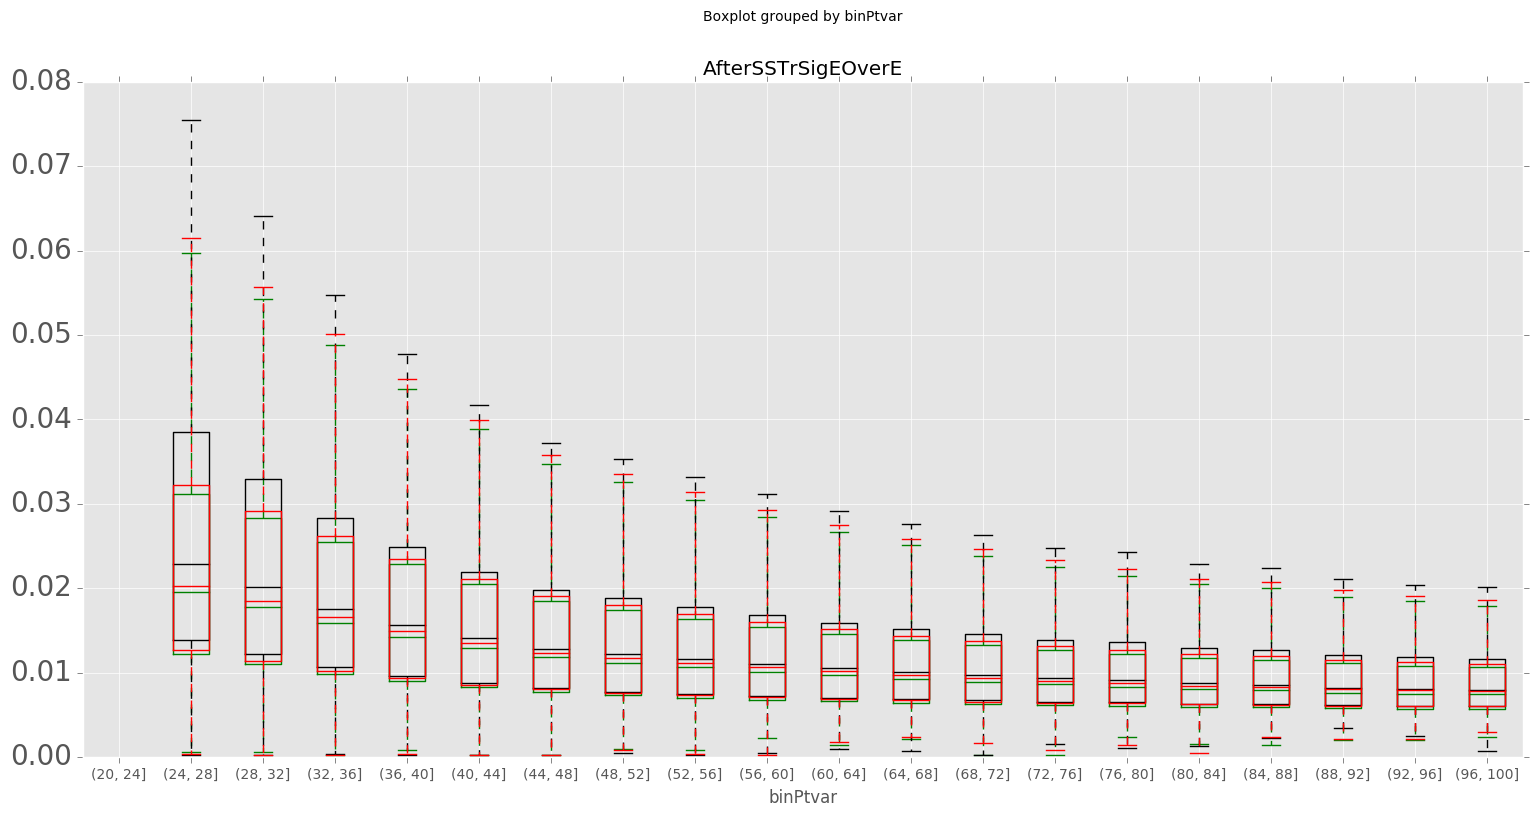

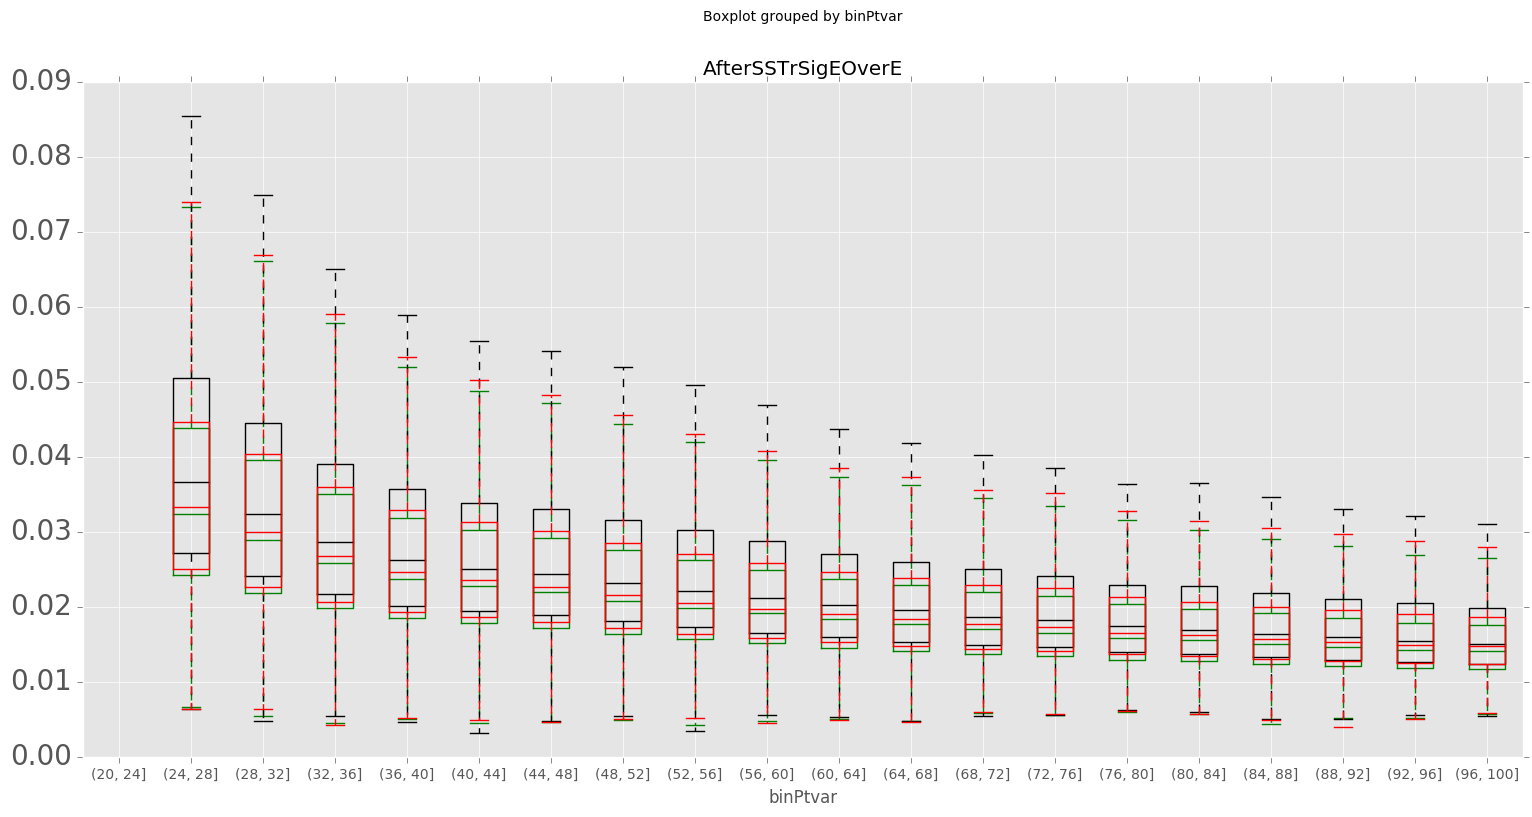

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)

bins = np.linspace(20,100,21)
bins = np.linspace(20,100,21)

ylist     = ["RecoSigEOverE"     ]
ylistcorr = ["AfterSSTrSigEOverE"]

for i in xrange(len(ylist)):
    
    y = ylist[i]    
    print "Plotting ", y
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    ###
    dfmc['binPtvar'] = pd.cut(dfmc["Pt"], bins)
    bpmc = dfmc.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('g') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    df['binPtvar'] = pd.cut(df["Pt"], bins)
    bpdata = df.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('black') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    ###
    ycorr = ylistcorr[i]
    print "Plotting ", ycorr
    dfmc['binPtvar'] = pd.cut(dfmc["Pt"], bins)
    bpmccorr = dfmc.boxplot(column=ycorr,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('r') for item in bpmccorr[key]['medians']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['boxes']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['whiskers']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['caps']] for key in bpmccorr.keys()]
    plt.savefig('datamc_sEoE_vs_Pt.png')

    
    ## EB
    y = ylist[i]    
    print "Plotting ", y
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    ###
    dfmcEB['binPtvar'] = pd.cut(dfmcEB["Pt"], bins)
    bpmc = dfmcEB.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('g') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    dfEB['binPtvar'] = pd.cut(dfEB["Pt"], bins)
    bpdata = dfEB.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('black') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    ###
    ycorr = ylistcorr[i]
    print "Plotting ", ycorr
    dfmcEB['binPtvar'] = pd.cut(dfmcEB["Pt"], bins)
    bpmccorr = dfmcEB.boxplot(column=ycorr,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('r') for item in bpmccorr[key]['medians']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['boxes']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['whiskers']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['caps']] for key in bpmccorr.keys()]
    plt.savefig('datamc_sEoE_vs_Pt_EB.png')

    
    ## EE
    y = ylist[i]    
    print "Plotting ", y
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    ###
    dfmcEE['binPtvar'] = pd.cut(dfmcEE["Pt"], bins)
    bpmc = dfmcEE.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('g') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    dfEE['binPtvar'] = pd.cut(dfEE["Pt"], bins)
    bpdata = dfEE.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('black') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    ###
    ycorr = ylistcorr[i]
    print "Plotting ", ycorr
    dfmcEE['binPtvar'] = pd.cut(dfmcEE["Pt"], bins)
    bpmccorr = dfmcEE.boxplot(column=ycorr,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('r') for item in bpmccorr[key]['medians']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['boxes']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['whiskers']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['caps']] for key in bpmccorr.keys()]
    plt.savefig('datamc_sEoE_vs_Pt_EE.png')

    
    
    
    

Plotting  RecoSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  AfterSSTrSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  RecoSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  AfterSSTrSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  RecoSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plotting  AfterSSTrSigEOverE


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


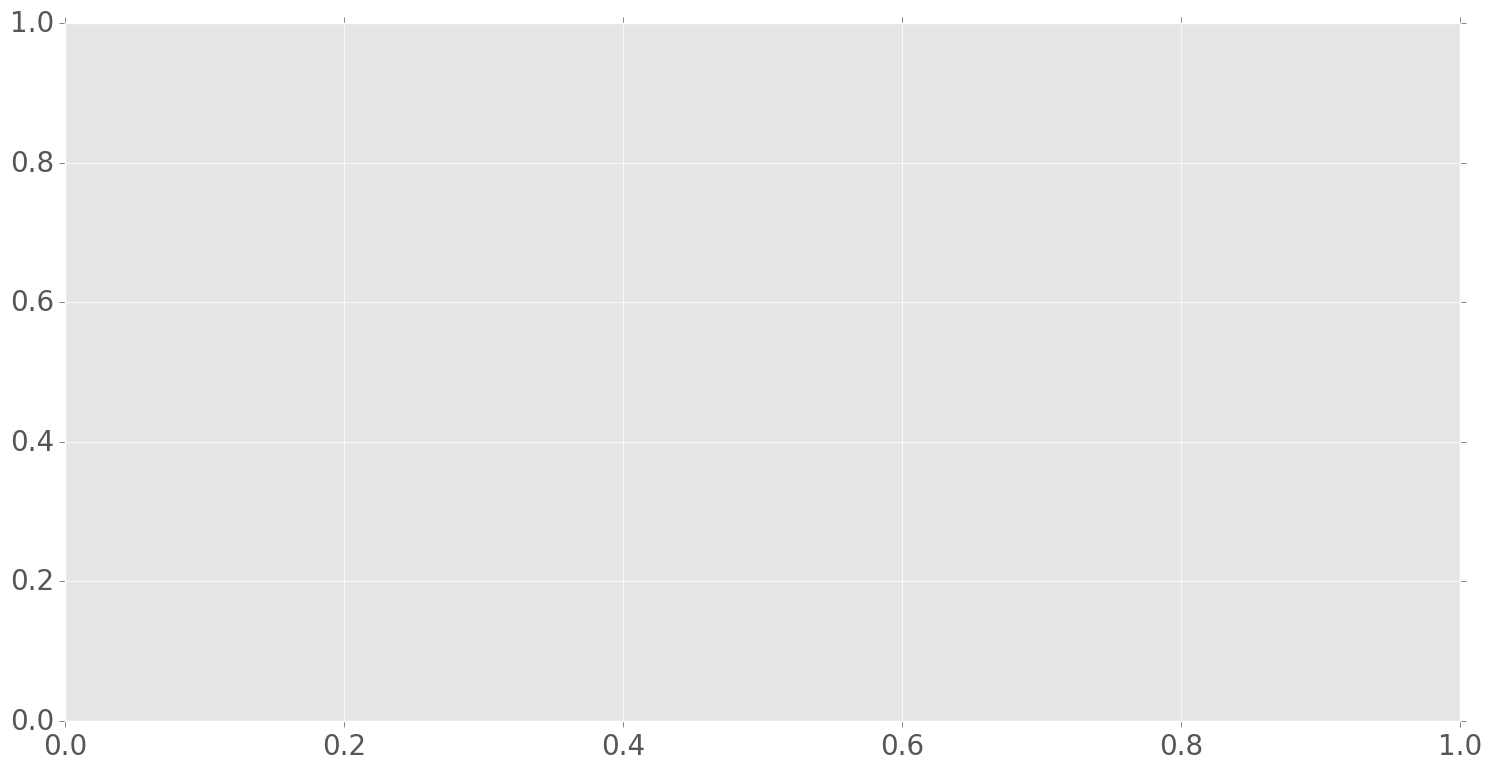

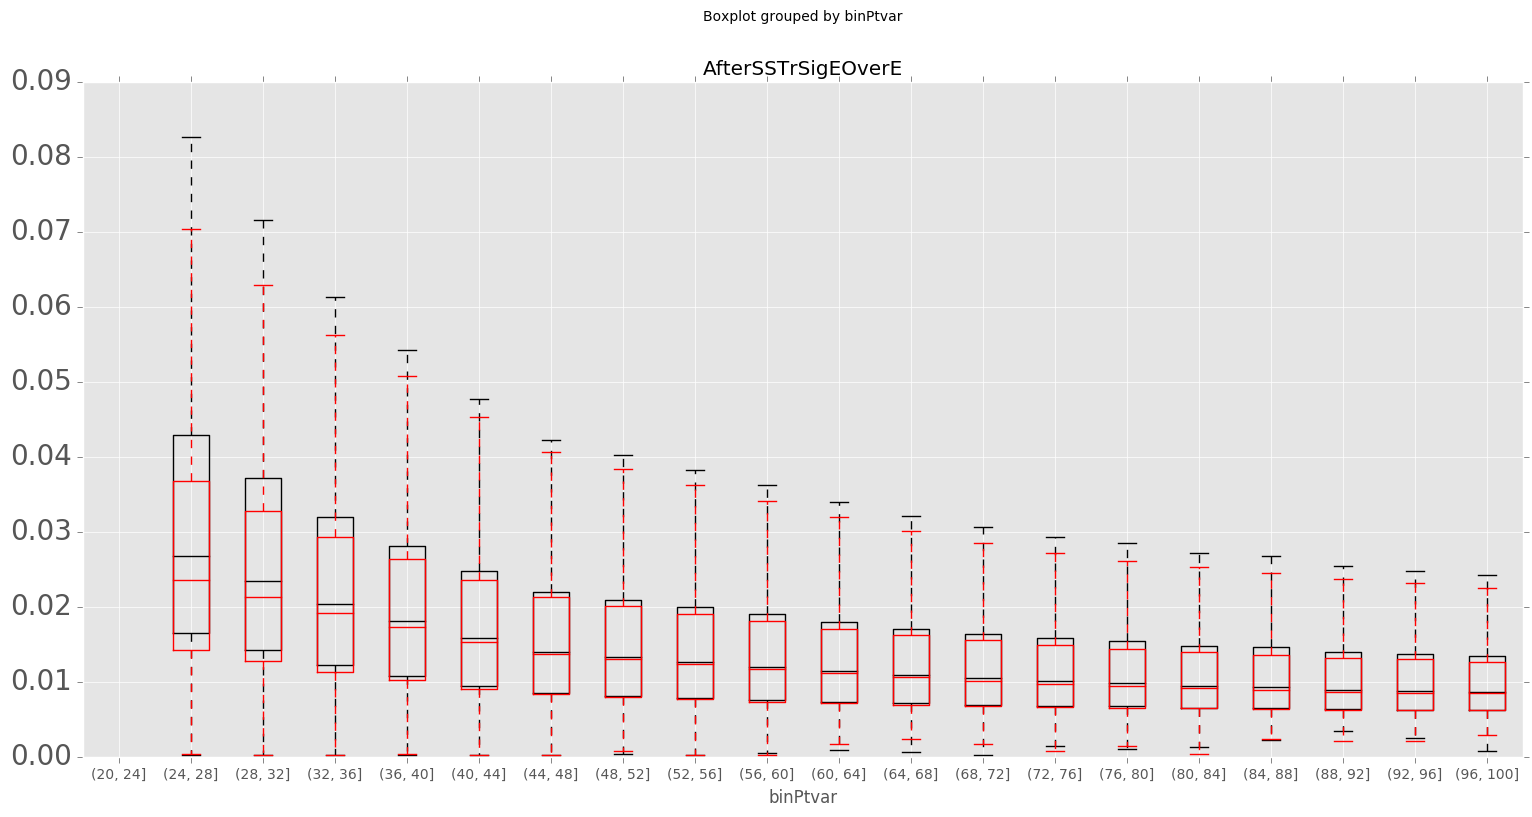

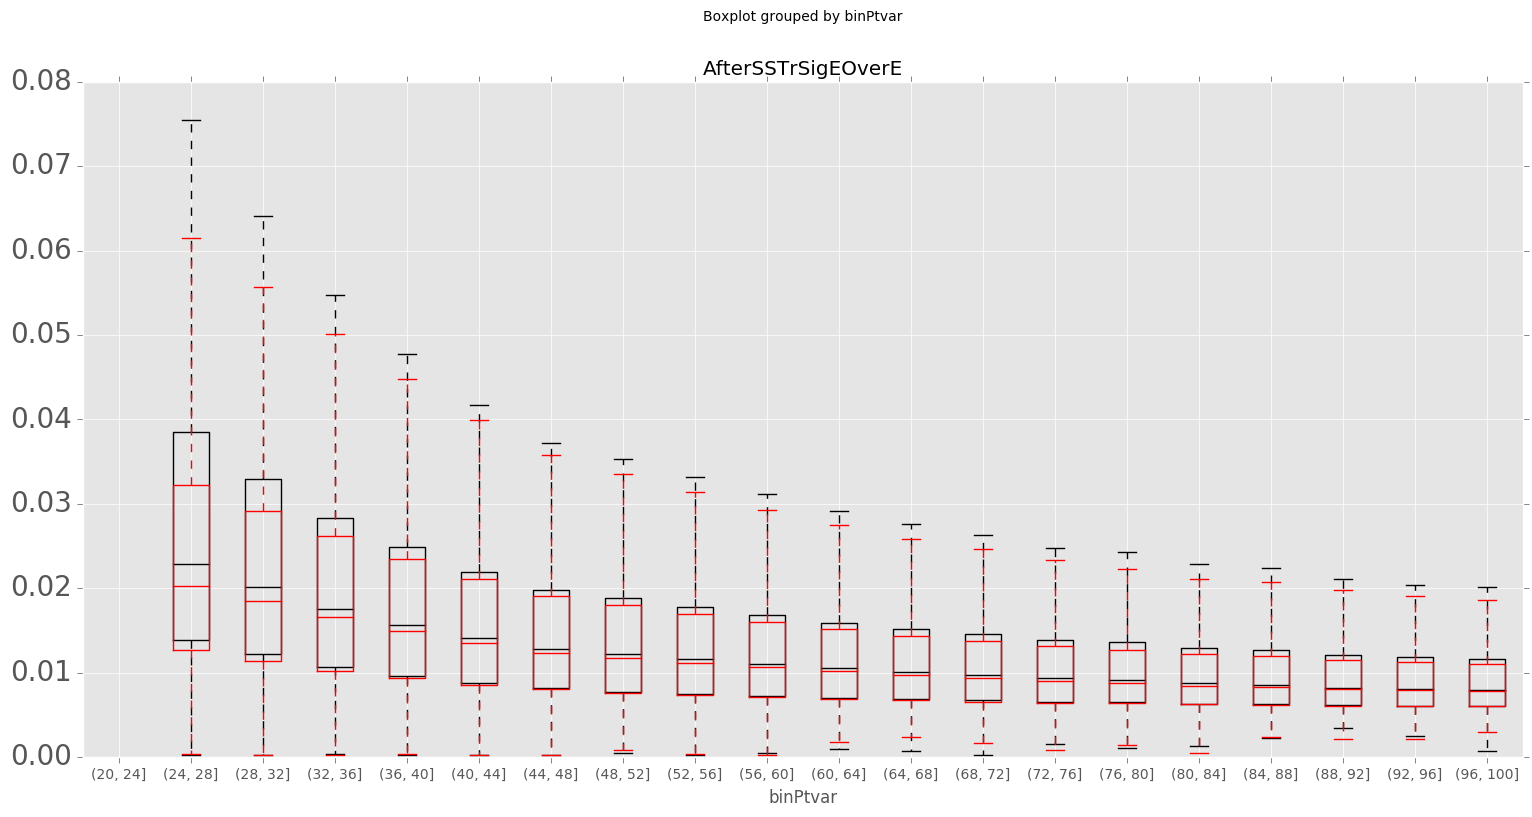

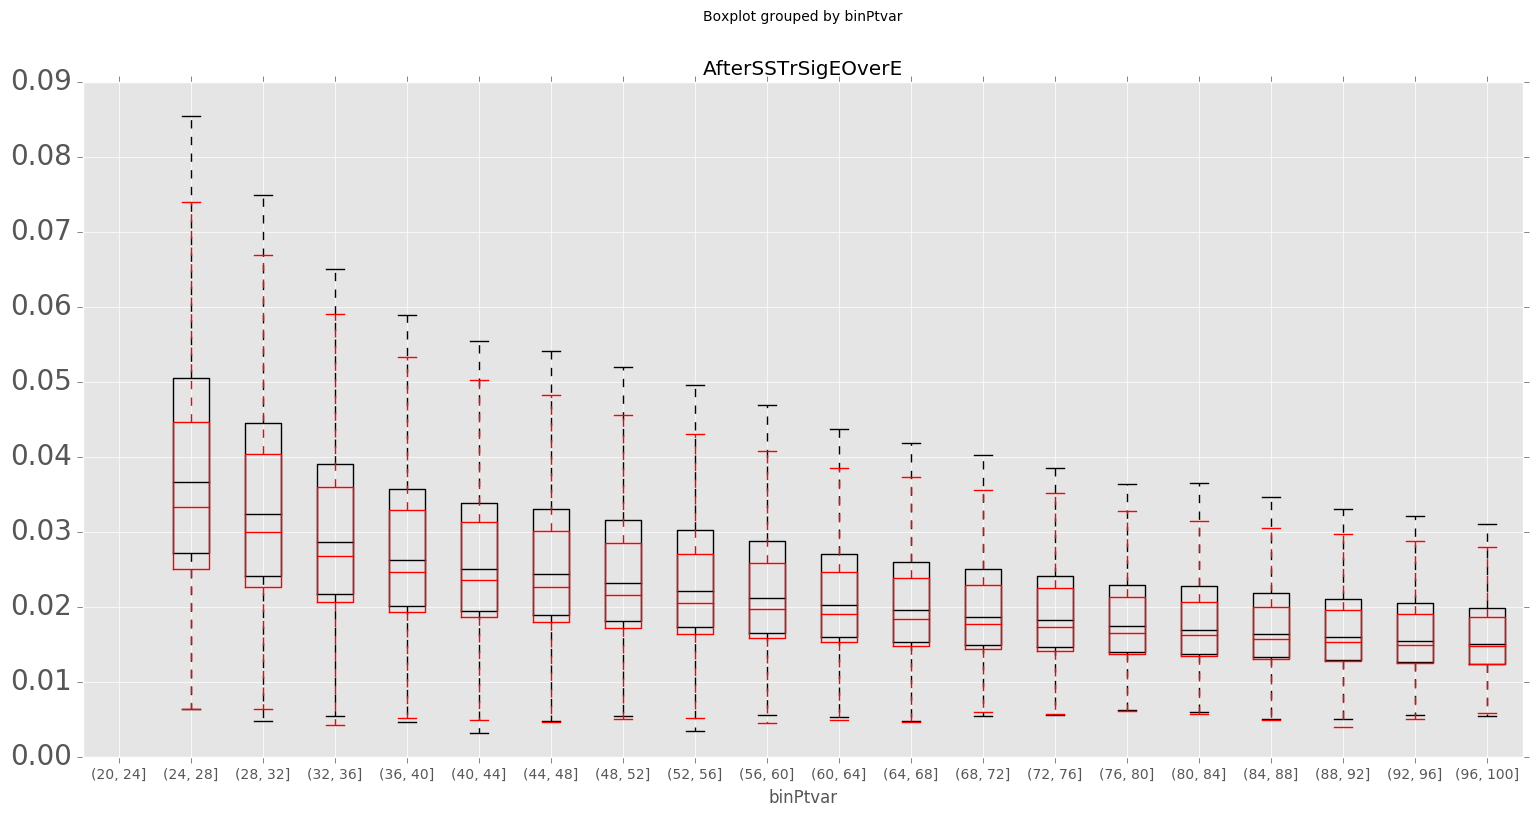

In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)

bins = np.linspace(20,100,21)
bins = np.linspace(20,100,21)

ylist     = ["RecoSigEOverE"     ]
ylistcorr = ["AfterSSTrSigEOverE"]

for i in xrange(len(ylist)):
    
    y = ylist[i]    
    print "Plotting ", y
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    ###
    # dfmc['binPtvar'] = pd.cut(dfmc["Pt"], bins)
    # bpmc = dfmc.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    # [[item.set_color('g') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    # [[item.set_color('g') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    # [[item.set_color('g') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    # [[item.set_color('g') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    df['binPtvar'] = pd.cut(df["Pt"], bins)
    bpdata = df.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('black') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    ###
    ycorr = ylistcorr[i]
    print "Plotting ", ycorr
    dfmc['binPtvar'] = pd.cut(dfmc["Pt"], bins)
    bpmccorr = dfmc.boxplot(column=ycorr,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('r') for item in bpmccorr[key]['medians']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['boxes']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['whiskers']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['caps']] for key in bpmccorr.keys()]
    plt.savefig('datamc_sEoE_vs_Pt.png')

    
    ## EB
    y = ylist[i]    
    print "Plotting ", y
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    ###
    # dfmcEB['binPtvar'] = pd.cut(dfmcEB["Pt"], bins)
    # bpmc = dfmcEB.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    # [[item.set_color('g') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    # [[item.set_color('g') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    # [[item.set_color('g') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    # [[item.set_color('g') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    dfEB['binPtvar' ] = pd.cut(dfEB["Pt"], bins)
    bpdata = dfEB.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('black') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    ###
    ycorr = ylistcorr[i]
    print "Plotting ", ycorr
    dfmcEB['binPtvar'] = pd.cut(dfmcEB["Pt"], bins)
    bpmccorr = dfmcEB.boxplot(column=ycorr,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('r') for item in bpmccorr[key]['medians']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['boxes']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['whiskers']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['caps']] for key in bpmccorr.keys()]
    plt.savefig('datamc_sEoE_vs_Pt_EB.png')

    
    ## EE
    y = ylist[i]    
    print "Plotting ", y
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    ###
    # dfmcEE['binPtvar'] = pd.cut(dfmcEE["Pt"], bins)
    # bpmc = dfmcEE.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    # [[item.set_color('g') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    # [[item.set_color('g') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    # [[item.set_color('g') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    # [[item.set_color('g') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    dfEE['binPtvar'] = pd.cut(dfEE["Pt"], bins)
    bpdata = dfEE.boxplot(column=y,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('black') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('black') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    ###
    ycorr = ylistcorr[i]
    print "Plotting ", ycorr
    dfmcEE['binPtvar'] = pd.cut(dfmcEE["Pt"], bins)
    bpmccorr = dfmcEE.boxplot(column=ycorr,by='binPtvar', return_type='dict', ax=ax, showfliers=False)
    [[item.set_color('r') for item in bpmccorr[key]['medians']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['boxes']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['whiskers']] for key in bpmccorr.keys()]
    [[item.set_color('r') for item in bpmccorr[key]['caps']] for key in bpmccorr.keys()]
    plt.savefig('datamc_sEoE_vs_Pt_EE.png')

    
    
    
    

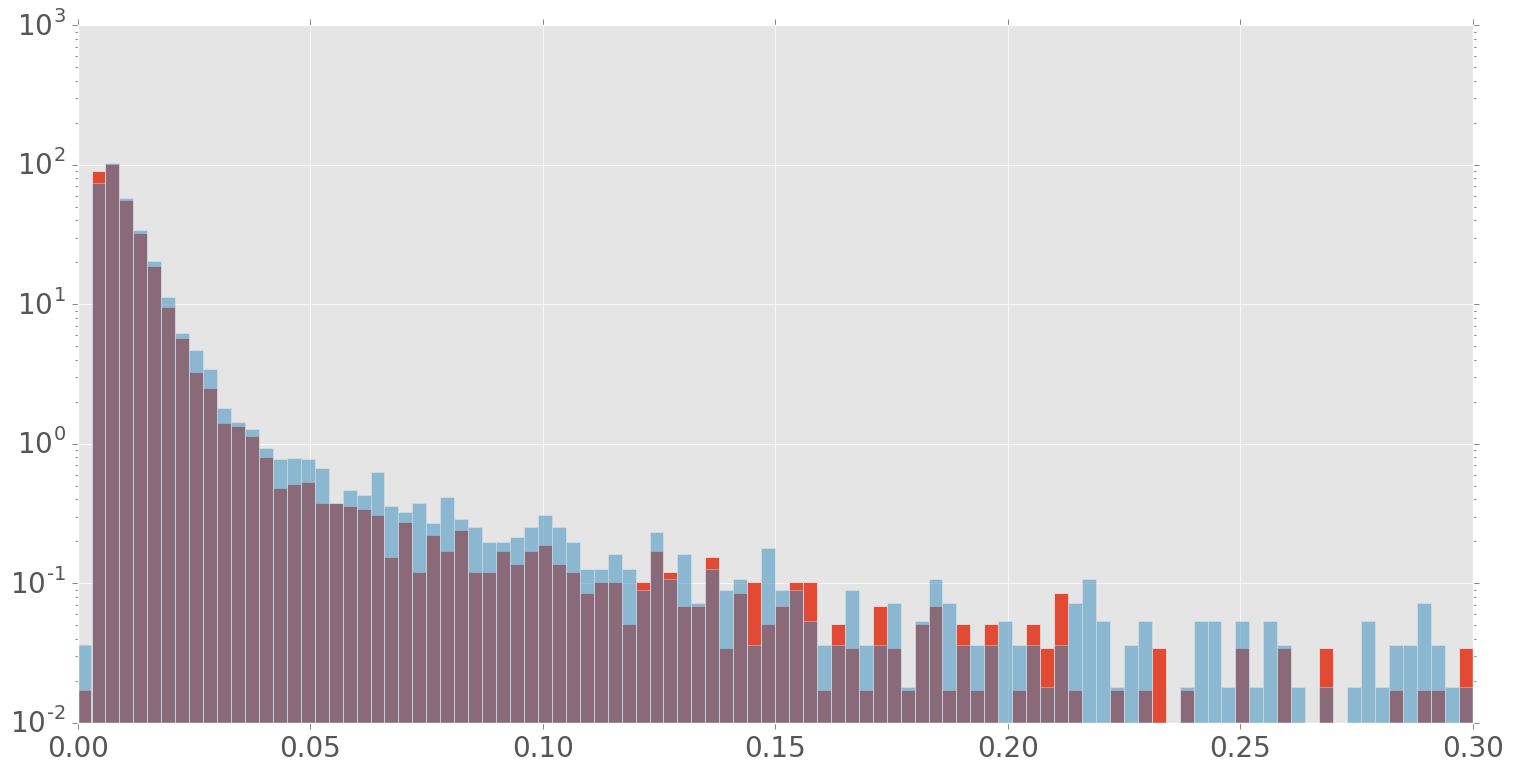

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)
    
cut = '96 < Pt and Pt < 100 '
plt.hist( dfmc.query(cut).RecoSigEOverE      , bins=np.linspace(0, 0.3, 101), normed=1,log = 'y' );
plt.hist( df.query  (cut).RecoSigEOverE      , bins=np.linspace(0, 0.3, 101), normed=1, alpha = 0.5 ,log = 'y');

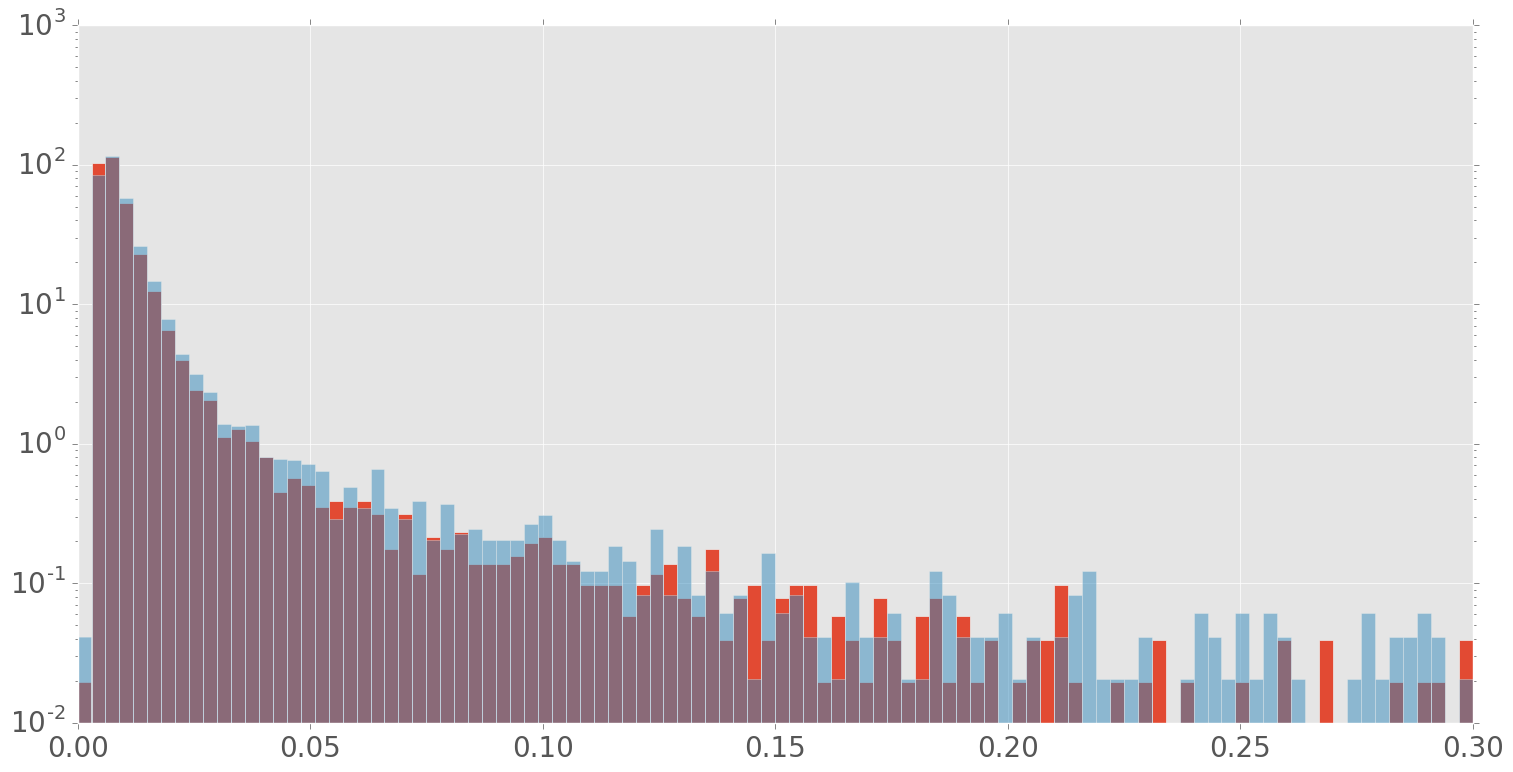

In [30]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)
cut = '96 < Pt and Pt < 100 '
plt.hist( dfmcEB.query(cut).RecoSigEOverE      , bins=np.linspace(0, 0.3, 101), normed=1,log = 'y' );
plt.hist( dfEB.query  (cut).RecoSigEOverE      , bins=np.linspace(0, 0.3, 101), normed=1, alpha = 0.5 ,log = 'y');

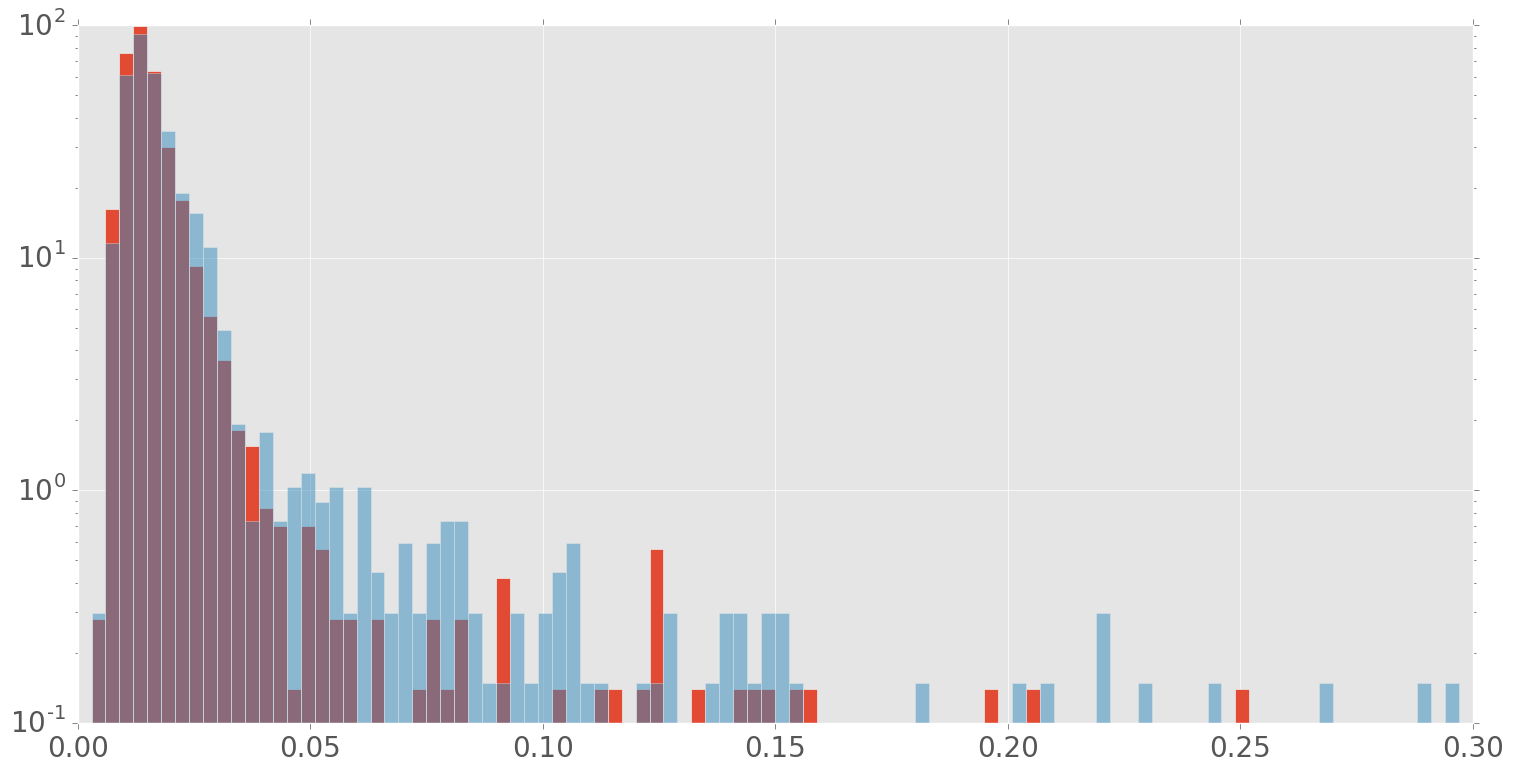

In [31]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)
cut = '96 < Pt and Pt < 100 '
plt.hist( dfmcEE.query(cut).RecoSigEOverE      , bins=np.linspace(0, 0.3, 101), normed=1,log = 'y' );
plt.hist( dfEE.query  (cut).RecoSigEOverE      , bins=np.linspace(0, 0.3, 101), normed=1, alpha = 0.5 ,log = 'y');

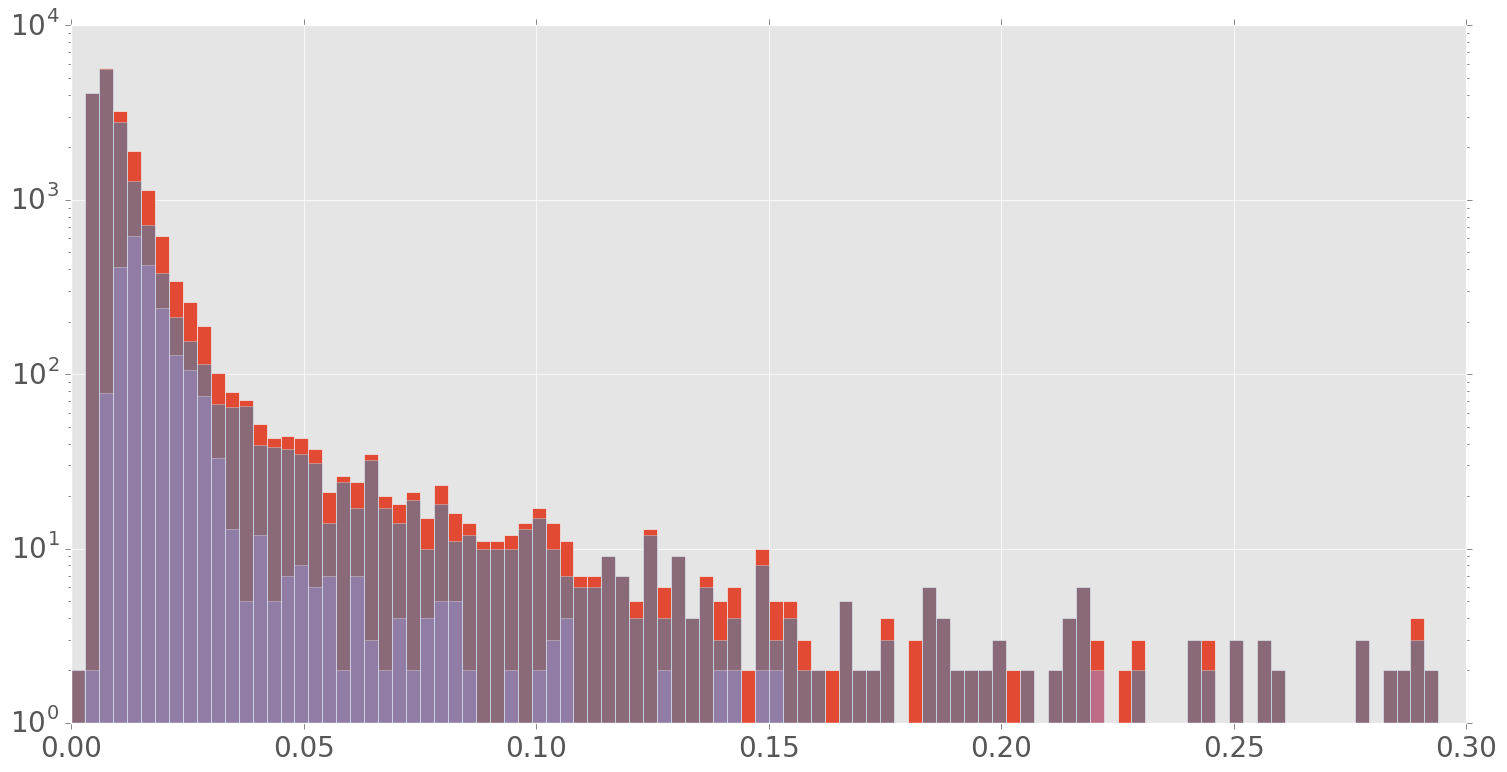

In [38]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)
cut = '96 < Pt and Pt < 100 '
plt.hist( df.  query(cut).RecoSigEOverE , bins=np.linspace(0, 0.3, 101), log = 'y' );
plt.hist( dfEB.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.3, 101), alpha = 0.5,log = 'y' );
plt.hist( dfEE.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.3, 101), alpha = 0.5,log = 'y' );


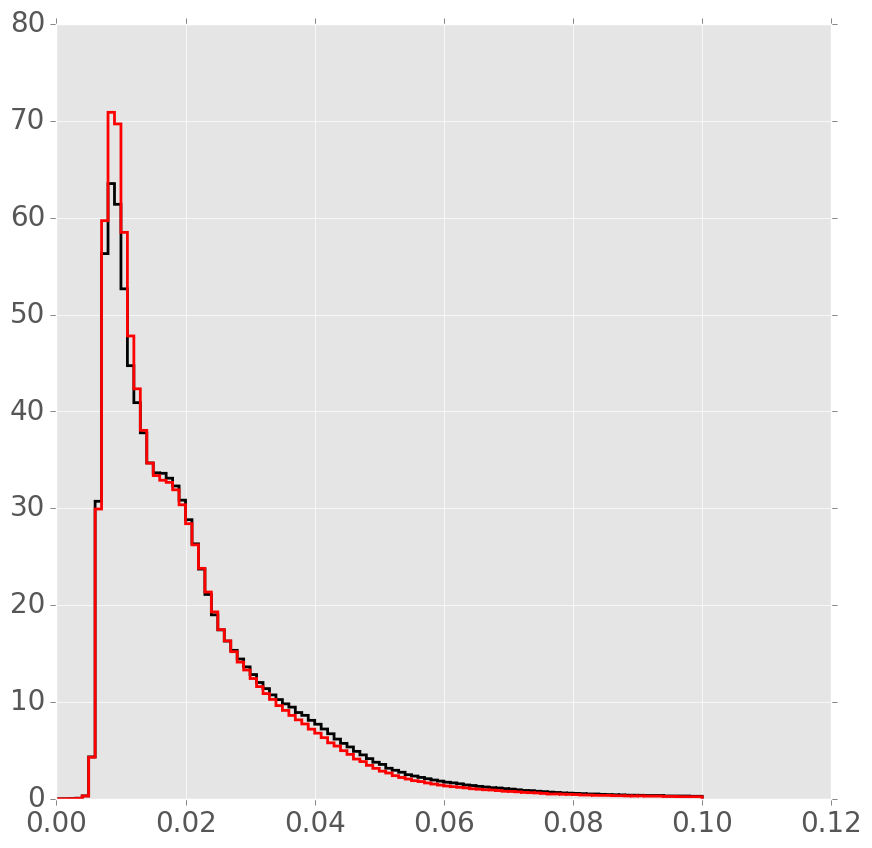

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cut = '20 < Pt and Pt < 40 '
plt.hist( dfEB.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.1, 101), normed=1, alpha = 1.0, histtype='step', color= 'black', lw=2); #); #,log = 'y' );
plt.hist( dfmcEB.query(cut).AfterSSTrSigEOverE , bins=np.linspace(0, 0.1, 101), normed=1, alpha = 1.0, histtype='step', color= 'red', lw=2); #0.5); #,log = 'y' );

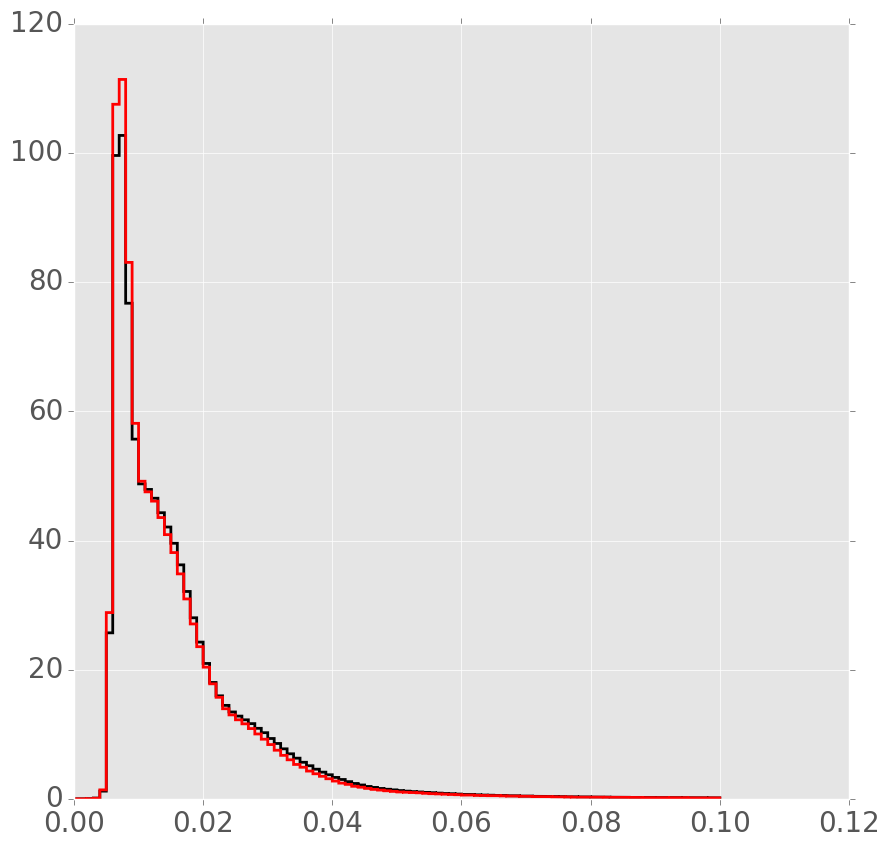

In [86]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cut = '40 < Pt and Pt < 60 '
plt.hist( dfEB.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.1, 101), normed=1, alpha = 1.0, histtype='step', color= 'black', lw=2); #0.5); #,log = 'y' );
plt.hist( dfmcEB.query(cut).AfterSSTrSigEOverE , bins=np.linspace(0, 0.1, 101), normed=1, alpha = 1.0, histtype='step', color= 'red', lw=2); #0.5); #,log = 'y' );

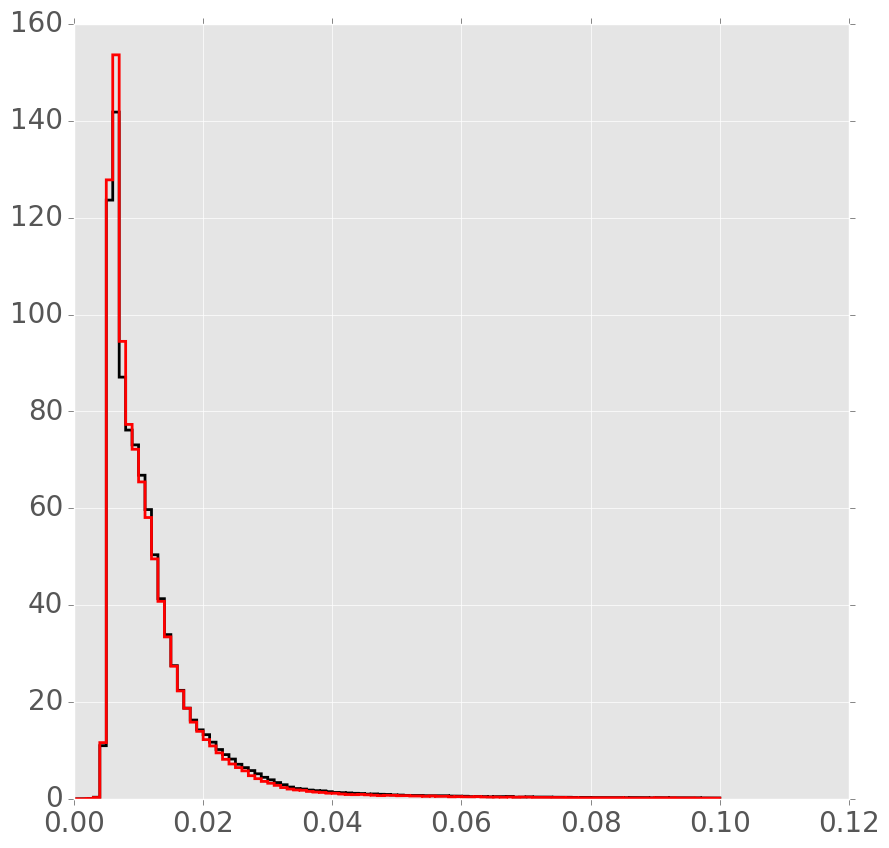

In [87]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cut = '60 < Pt and Pt < 80 '
plt.hist( dfEB.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.1, 101), normed=1, alpha = 1.0, histtype='step', color= 'black', lw=2); #0.5); #,log = 'y' );
plt.hist( dfmcEB.query(cut).AfterSSTrSigEOverE , bins=np.linspace(0, 0.1, 101), normed=1, alpha = 1.0, histtype='step', color= 'red', lw=2); #0.5); #,log = 'y' );

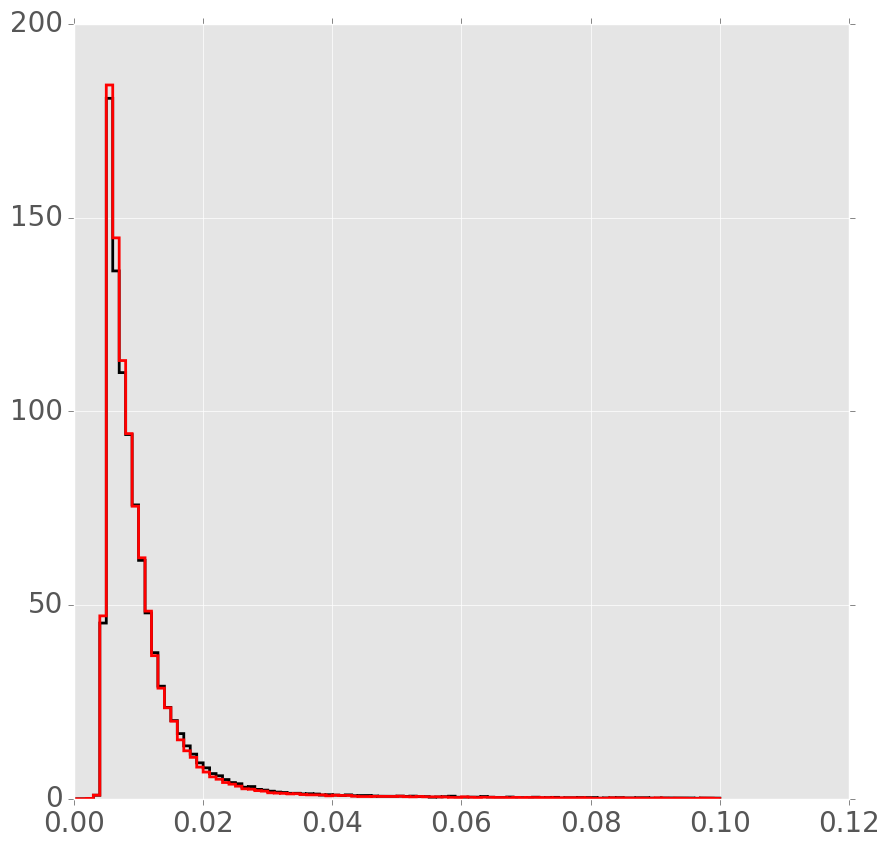

In [88]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cut = '80 < Pt and Pt < 100 '
plt.hist( dfEB.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.1, 101), normed=1, alpha = 1.0, histtype='step', color= 'black', lw=2); #0.5); #,log = 'y' );
plt.hist( dfmcEB.query(cut).AfterSSTrSigEOverE , bins=np.linspace(0, 0.1, 101), normed=1, alpha = 1.0, histtype='step', color= 'red', lw=2); #0.5); #,log = 'y' );

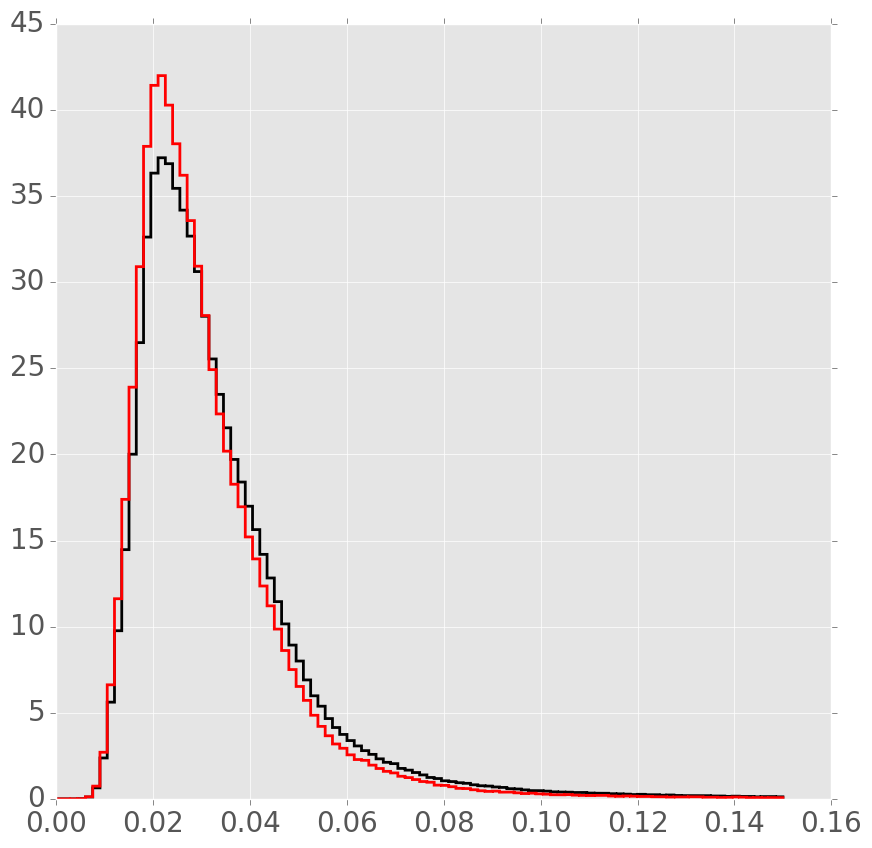

In [89]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cut = '20 < Pt and Pt < 40 '
plt.hist( dfEE.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.15, 101), normed=1, alpha = 1.0, histtype='step', color= 'black', lw=2); #0.5); #,log = 'y' );
plt.hist( dfmcEE.query(cut).AfterSSTrSigEOverE , bins=np.linspace(0, 0.15, 101), normed=1, alpha = 1.0, histtype='step', color= 'red', lw=2); #0.5); #,log = 'y' );

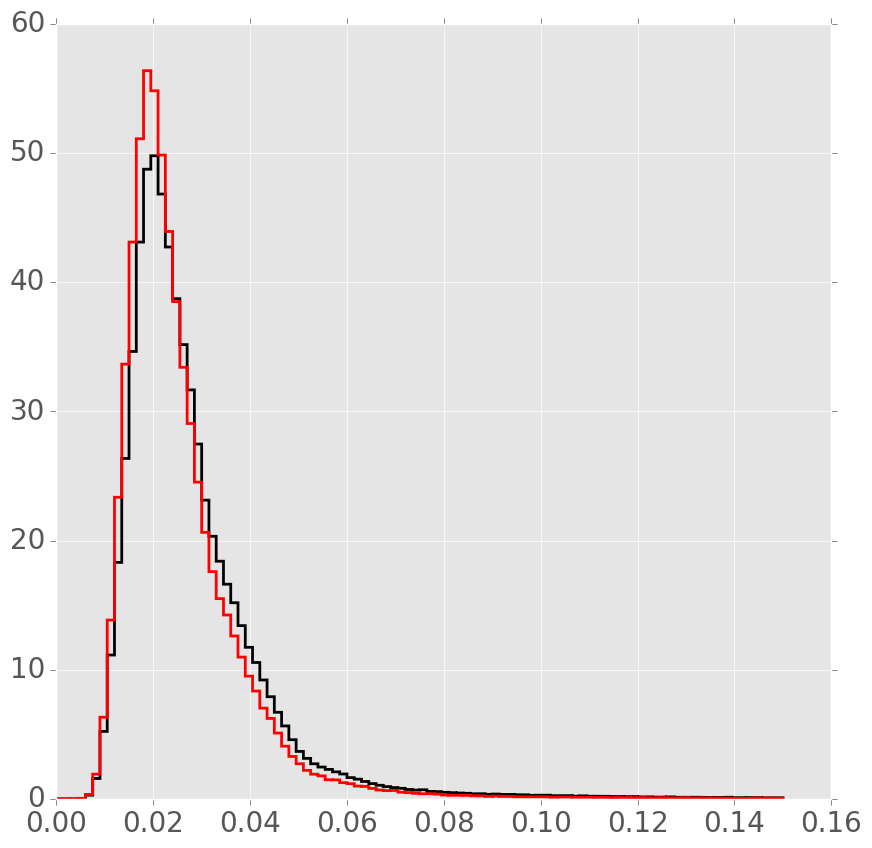

In [90]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cut = '40 < Pt and Pt < 60 '
plt.hist( dfEE.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.15, 101), normed=1, alpha = 1.0, histtype='step', color= 'black', lw=2); #0.5); #,log = 'y' );
plt.hist( dfmcEE.query(cut).AfterSSTrSigEOverE , bins=np.linspace(0, 0.15, 101), normed=1, alpha = 1.0, histtype='step', color= 'red', lw=2); #0.5); #,log = 'y' );

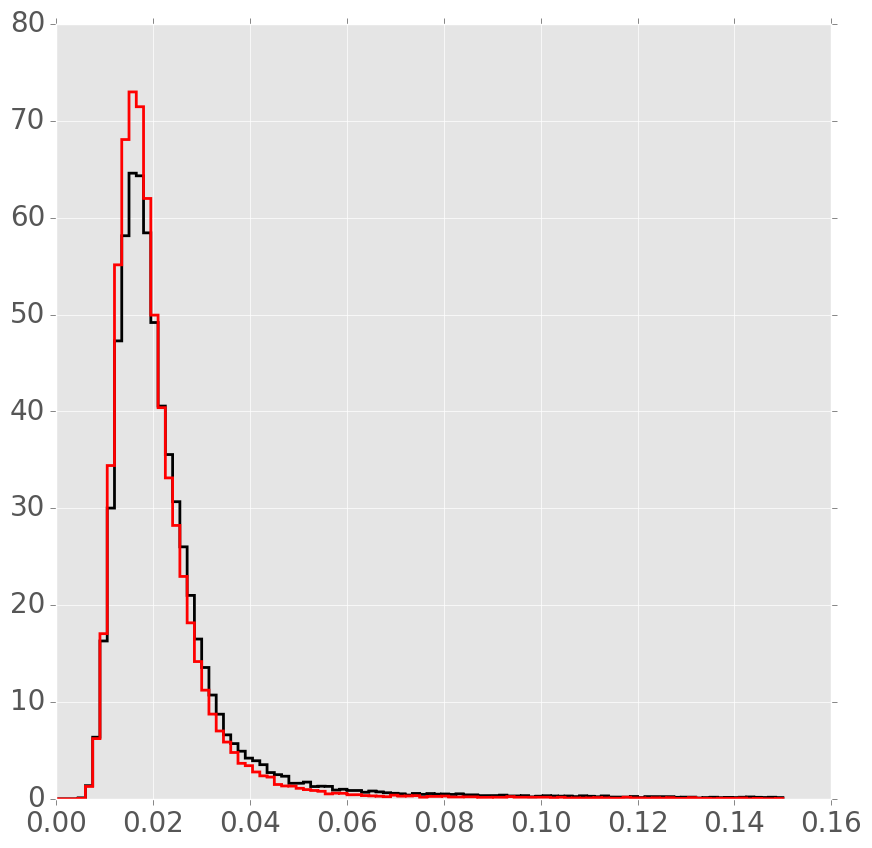

In [91]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cut = '60 < Pt and Pt < 80 '
plt.hist( dfEE.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.15, 101), normed=1, alpha = 1.0, histtype='step', color= 'black', lw=2); #0.5); #,log = 'y' );
plt.hist( dfmcEE.query(cut).AfterSSTrSigEOverE , bins=np.linspace(0, 0.15, 101), normed=1, alpha = 1.0, histtype='step', color= 'red', lw=2); #0.5); #,log = 'y' );

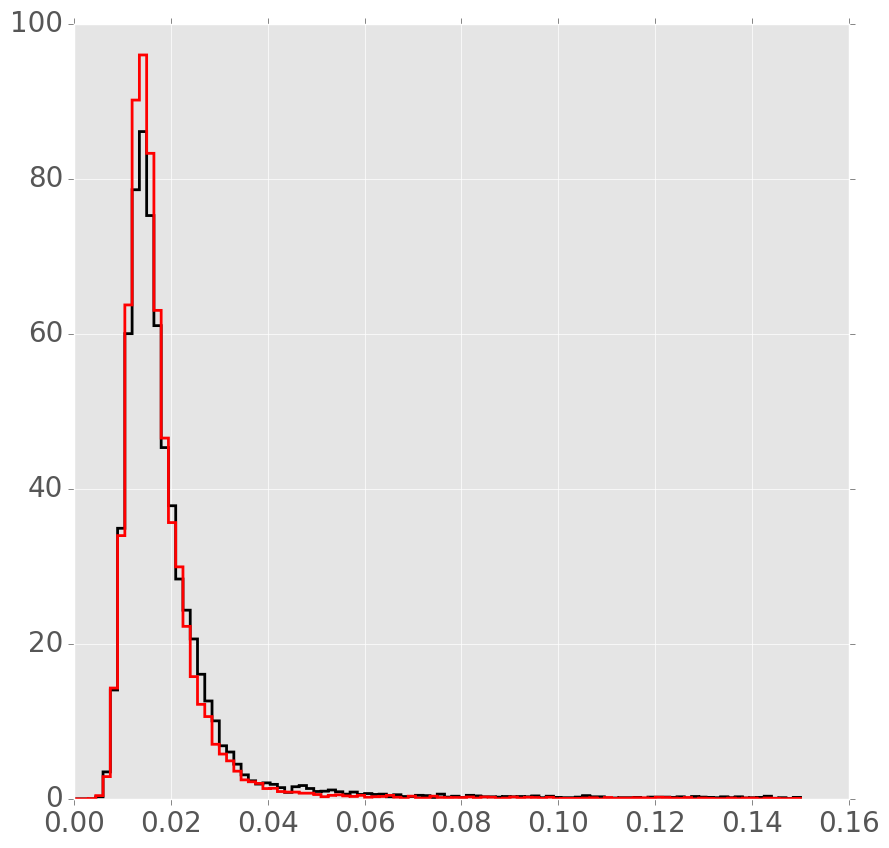

In [92]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cut = '80 < Pt and Pt < 100 '
plt.hist( dfEE.query(cut).RecoSigEOverE , bins=np.linspace(0, 0.15, 101), normed=1, alpha = 1.0, histtype='step', color= 'black', lw=2); #1.0, histtype='step', color= 'black', lw=2); #,log = 'y' );
plt.hist( dfmcEE.query(cut).AfterSSTrSigEOverE , bins=np.linspace(0, 0.15, 101), normed=1, alpha = 1.0, histtype='step', color= 'red', lw=2); #1.0,  histtype='step', lw=2); #,log = 'y' );
